<a href="https://colab.research.google.com/github/GFDRR/disaster-fcv-colocation-mapping/blob/master/examples/demo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Setup

Note: after running the first cell, you will be prompted to restart the session. Hit `Restart session` and continue running the rest of the cells.

In [ ]:
!pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ dfcv-colocation-mapping==0.4.5

In [1]:
%%capture
!apt install gdal-bin

In [4]:
import warnings
warnings.filterwarnings(action="ignore", message=r"datetime.datetime.utcnow")

from dfcv_colocation_mapping import data_download
from dfcv_colocation_mapping import data_utils
from dfcv_colocation_mapping import map_utils

import re
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Download Datasets

In [8]:
iso_code = "RWA (Rwanda)"  # @param ["ABW (Aruba)", "AGO (Angola)", "AIA (Anguilla)", "ARG (Argentina)", "ATG (Antigua and Barbuda)", "BDI (Burundi)", "BEN (Benin)", "BFA (Burkina Faso)", "BGD (Bangladesh)", "BHS (The Bahamas)", "BLM (Saint Barthelemy)", "BLZ (Belize)", "BOL (Bolivia)", "BRA (Brazil)", "BRB (Barbados)", "BRN (Brunei)", "BTN (Bhutan)", "BWA (Botswana)", "CAF (Central African Republic)", "CHL (Chile)", "CIV (Ivory Coast)", "CMR (Cameroon)", "COD (Democratic Republic of the Congo)", "COG (Republic of Congo)", "COL (Colombia)", "COM (Comoros)", "CPV (Cape Verde)", "CRI (Costa Rica)", "CUB (Cuba)", "CUW (Cura\u00e7ao)", "CYM (Cayman Islands)", "DJI (Djibouti)", "DMA (Dominica)", "DOM (Dominican Republic)", "DZA (Algeria)", "ECU (Ecuador)", "EGY (Egypt)", "ERI (Eritrea)", "ETH (Ethiopia)", "FLK (Falkland Islands)", "GAB (Gabon)", "GHA (Ghana)", "GIN (Guinea)", "GMB (Gambia)", "GNB (Guinea Bissau)", "GNQ (Equatorial Guinea)", "GRD (Grenada)", "GTM (Guatemala)", "GUY (Guyana)", "HND (Honduras)", "HTI (Haiti)", "IDN (Indonesia)", "IND (India)", "IOT (British Indian Ocean Territory)", "JAM (Jamaica)", "KEN (Kenya)", "KHM (Cambodia)", "KNA (Saint Kitts and Nevis)", "LAO (Laos)", "LBR (Liberia)", "LCA (Saint Lucia)", "LKA (Sri Lanka)", "LSO (Lesotho)", "MAF (Saint Martin)", "MDG (Madagascar)", "MDV (Maldives)", "MEX (Mexico)", "MOZ (Mozambique)", "MRT (Mauritania)", "MSR (Montserrat)", "MUS (Mauritius)", "MWI (Malawi)", "MYS (Malaysia)", "MYT (Mayotte)", "NAM (Namibia)", "NER (Niger)", "NGA (Nigeria)", "NIC (Nicaragua)", "NPL (Nepal)", "PAN (Panama)", "PER (Peru)", "PHL (Philippines)", "PRI (Puerto Rico)", "PRY (Paraguay)", "RWA (Rwanda)", "SDN (Sudan)", "SEN (Senegal)", "SGP (Singapore)", "SHN (Saint Helena)", "SLE (Sierra Leone)", "SLV (El Salvador)", "SOM (Somalia)", "SSD (South Sudan)", "STP (Sao Tome and Principe)", "SUR (Suriname)", "SWZ (Eswatini)", "SXM (Sint Maarten)", "SYC (Seychelles)", "TCA (Turks and Caicos Islands)", "TGO (Togo)", "THA (Thailand)", "TLS (East Timor)", "TTO (Trinidad and Tobago)", "TUN (Tunisia)", "TZA (United Republic of Tanzania)", "UGA (Uganda)", "URY (Uruguay)", "VCT (Saint Vincent and the Grenadines)", "VEN (Venezuela)", "VGB (British Virgin Islands)", "VIR (United States Virgin Islands)", "VNM (Vietnam)", "ZAF (South Africa)", "ZMB (Zambia)", "ZWE (Zimbabwe)"]
iso_code = re.sub(r'\([^)]*\)', '', iso_code).strip()
adm_level = "ADM3" # @param ["ADM1", "ADM2", "ADM3"]

conflict_start_date = "2005-01-01" # @param {type: "date"}
conflict_end_date = "2025-01-01" # @param {type: "date"}

mhs_aggregation= "power_mean" # @param ["power_mean", "arithmetic_mean", "geometric_mean"]

acled_key = None  # @param {type: "string"}
acled_email = None # @param {type: "string"}

dm = data_download.DatasetManager(
    iso_code,
    adm_level=adm_level,
    conflict_start_date=conflict_start_date,
    conflict_end_date=conflict_end_date,
    mhs_aggregation=mhs_aggregation,
    acled_key=acled_key,
    acled_email=acled_email
)
geoplot = map_utils.GeoPlot(dm)
dm.data.sort_values(f"mhs_all_ucdp_worldpop_exposure_relative", ascending=False).head(3)

INFO:root:Loading geoboundary...
INFO:root:Loading asset and hazard layers...
INFO:root:Downloading conflict data from 2005-01-01 to 2025-01-01
INFO:root:Loading ACLED conflict data...
INFO:root:Downloading ACLED data for RWA...
INFO:root:Reading ACLED page 1...
INFO:root:Reading ACLED page 2...
INFO:pyogrio._io:Created 510 records
INFO:root:ACLED file saved to /content/data/RWA/RWA_ACLED.geojson.
INFO:pyogrio._io:Created 416 records
INFO:pyogrio._io:Created 510 records
INFO:root:Temporary file saved to /content/data/RWA/RWA_ACLED_TEMP.geojson.
INFO:pyogrio._io:Created 416 records
INFO:root:Zonal stats saved to /content/data/RWA/RWA_ACLED_WORLDPOP_EXPOSURE_ADM3.geojson.
INFO:root:Loading UCDP conflict data...
INFO:root:Calculating scores...
INFO:root:Downloading OSM...


iso_code       ADM3                  ADM3_ID                  ADM2_ID     ADM2                  ADM1_ID              ADM1      worldpop                                           geometry  earthquake  earthquake_worldpop_exposure  earthquake_worldpop_intensity_weighted_exposure  landslide  landslide_worldpop_exposure  landslide_worldpop_intensity_weighted_exposure   cyclone  cyclone_worldpop_exposure  cyclone_worldpop_intensity_weighted_exposure   drought  drought_worldpop_exposure  drought_worldpop_intensity_weighted_exposure  heat_stress  heat_stress_worldpop_exposure  heat_stress_worldpop_intensity_weighted_exposure  fluvial_flood  fluvial_flood_worldpop_exposure  fluvial_flood_worldpop_intensity_weighted_exposure   wildfire  wildfire_worldpop_exposure  wildfire_worldpop_intensity_weighted_exposure  acled_population_best  acled_conflict_count  acled_fatalities  acled_null_conflict_count  acled_exposure  acled_fatalities_per_conflict  wbg_acled_worldpop_exposure  \
170      RWA  Nyamyumba  94199721B54264211227542  40016504B41870686260998   Rubavu  46589978B43518966718904  Western Province  46052.453125  POLYGON ((29.31081 -1.73826, 29.31066 -1.73782...    0.208933                  46052.453125                                     37130.050781   3.191489                 45274.078125                                    40167.820312  0.002091                        0.0                                           0.0  1.599028                        0.0                                           0.0  2029.780488                            0.0                                               0.0            0.0                              0.0                                                0.0   20.519485                46052.453125                                   20950.109375                    NaN                   1.0               1.0                        1.0             NaN                       1.000000                 46052.453125   
173      RWA   Rugerero  94199721B25246697837793  40016504B41870686260998   Rubavu  46589978B43518966718904  Western Province  71924.945312  POLYGON ((29.27015 -1.71473, 29.27041 -1.71484...    0.208847                  71924.945312                                     57371.257812   2.791667                 47125.546875                                    42090.910156  0.001947                        0.0                                           0.0  1.599028                        0.0                                           0.0  2420.042553                            0.0                                               0.0            0.0                              0.0                                                0.0   20.519485                71924.945312                                   32719.984375               264394.0                  22.0              15.0                       12.0         26439.4                       0.681818                 71924.945312   
151      RWA     Kigeyo  94199721B42838117711864  40016504B58353894398581  Rutsiro  46589978B43518966718904  Western Province  25719.466797  MULTIPOLYGON (((29.28695 -1.83343, 29.28715 -1...    0.208546                  25719.466797                                     20602.261719   3.142857                 23301.015625                                    20119.552734  0.003107                        0.0                                           0.0  1.456254                        0.0                                           0.0  1970.093750                            0.0                                               0.0            0.0                              0.0                                                0.0   20.519485                25719.466797                                   11700.259766                    NaN                   NaN               NaN                        NaN             NaN                            NaN                          NaN   

     ucdp_conflict_count  ucdp_fatalities  ucdp_worldpop_exposu

## AHP Weight Calculation [Optional]

In [6]:
dm.calculate_ahp()
geoplot = map_utils.GeoPlot(dm)
dm.data.sort_values("mhs_all_worldpop_exposure_relative", ascending=False).head(3)

How much more important is fluvial_flood compared to drought: 1
How much more important is fluvial_flood compared to cyclone: 1
How much more important is fluvial_flood compared to heat_stress: 1
How much more important is fluvial_flood compared to landslide: 1
How much more important is fluvial_flood compared to earthquake: 1
How much more important is fluvial_flood compared to wildfire: 1
How much more important is drought compared to cyclone: 1
How much more important is drought compared to heat_stress: 1
How much more important is drought compared to landslide: 1
How much more important is drought compared to earthquake: 1
How much more important is drought compared to wildfire: 1
How much more important is cyclone compared to heat_stress: 1
How much more important is cyclone compared to landslide: 1
How much more important is cyclone compared to earthquake: 1
How much more important is cyclone compared to wildfire: 1
How much more important is heat_stress compared to landslide: 1


INFO:root:Consistency_ratio: 0.0
INFO:root:{'hydrological': {'fluvial_flood': 0.14286, 'fluvial_defended': 1, 'pluvial_defended': 1, 'coastal_defended': 1, 'drought': 0.14286}, 'atmospheric': {'cyclone': 0.14286, 'heat_stress': 0.14286}, 'geophysical': {'landslide': 0.14286, 'earthquake': 0.14286}, 'biophysical': {'wildfire': 0.14286}}


iso_code      ADM3                  ADM3_ID                  ADM2_ID    ADM2                  ADM1_ID               ADM1      worldpop                                           geometry  earthquake  earthquake_worldpop_exposure  earthquake_worldpop_intensity_weighted_exposure  landslide  landslide_worldpop_exposure  landslide_worldpop_intensity_weighted_exposure   cyclone  cyclone_worldpop_exposure  cyclone_worldpop_intensity_weighted_exposure   drought  drought_worldpop_exposure  drought_worldpop_intensity_weighted_exposure  heat_stress  heat_stress_worldpop_exposure  heat_stress_worldpop_intensity_weighted_exposure  fluvial_flood  fluvial_flood_worldpop_exposure  fluvial_flood_worldpop_intensity_weighted_exposure   wildfire  wildfire_worldpop_exposure  wildfire_worldpop_intensity_weighted_exposure  ucdp_conflict_count  ucdp_fatalities  ucdp_worldpop_exposure  ucdp_fatalities_per_conflict  earthquake_worldpop_exposure_relative  \
208      RWA   Muganza  94199721B11801523768413  40016504B69203145422490  Rusizi  46589978B43518966718904   Western Province  40401.023438  POLYGON ((29.02501 -2.68467, 29.02497 -2.68459...    0.251043                  40401.023438                                     38485.191406   1.700000                  5458.532227                                     4298.861816  0.000000                        0.0                                           0.0  1.384866                        0.0                                           0.0  3209.741935                   28093.412109                                      25366.058594           0.00                         0.000000                                           0.000000   28.606815                40401.023438                                   27711.896484                  NaN              NaN                     NaN                           NaN                                    1.0   
199      RWA  Bugarama  94199721B28126171529858  40016504B69203145422490  Rusizi  46589978B43518966718904   Western Province  31459.771484  POLYGON ((29.02501 -2.68467, 29.02497 -2.68469...    0.233319                  31459.771484                                     27851.310547   1.978723                 10111.617188                                     8990.614258  0.003393                        0.0                                           0.0  1.806987                        0.0                                           0.0  3327.325581                   14060.031250                                      13152.222656           5.28                      3648.251465                                         956.438965   35.044033                31459.771484                                   24442.000000                  NaN              NaN                     NaN                           NaN                                    1.0   
42       RWA    Ntyazo   94199721B6838010864457  40016504B55405110409338  Nyanza  46589978B41058743603332  Southern Province  39188.632812  POLYGON ((29.84775 -2.38486, 29.84719 -2.38474...    0.123423                      0.000000                                         0.000000   2.009615                 11168.768555                                     8376.576172  0.010071                        0.0                                           0.0  0.611259                        0.0                                           0.0  3106.365591                   23652.025391                                      20773.509766           0.00                         0.000000                                           0.000000   36.181076                39188.632812                                   29984.900391                  NaN              NaN                     NaN                           NaN                                    0.0   

     earthquake_worldpop_intensity_weighted_exposure_relative  landslide_worldpop_exposure_relative  landslide_worldpop_intensity_weighted_exposure_relative  cyclone_worldpop_exposure_relative  cyclone_world

## Plot Geoboundaries

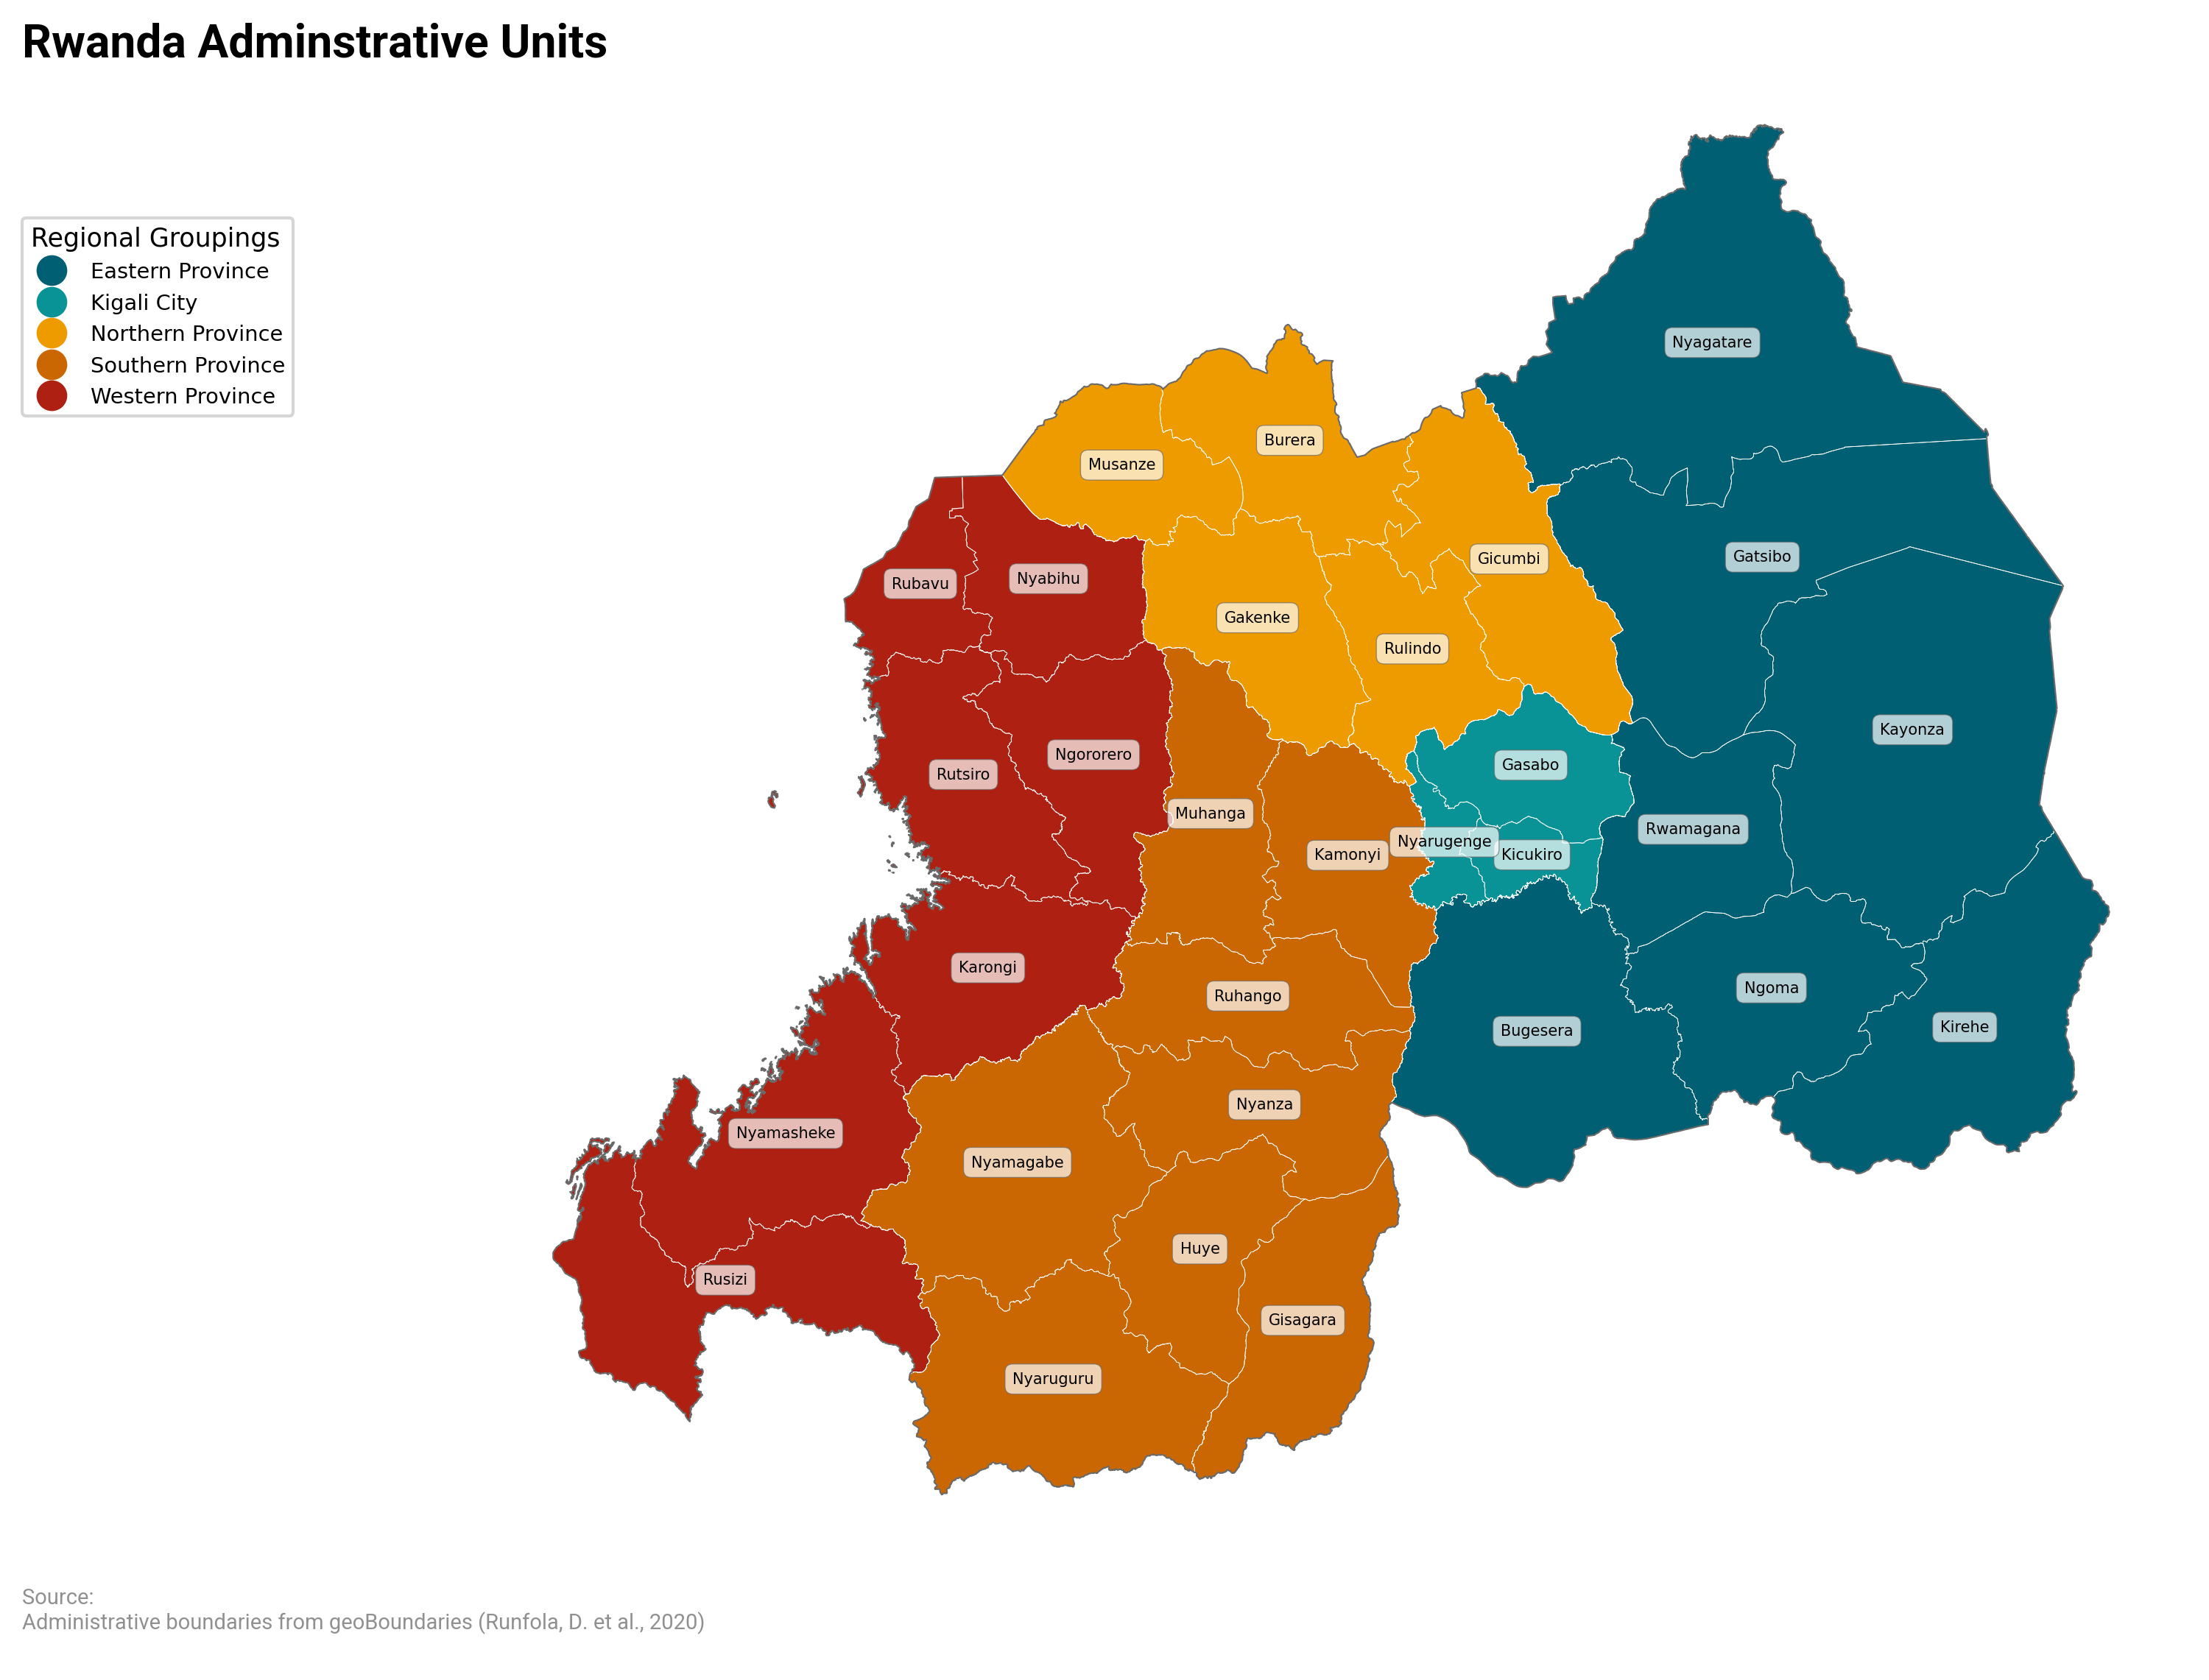

In [9]:
geoplot.plot_geoboundaries(
    adm_level="ADM2",
    group="ADM1"
);

## Plot Asset Distribution

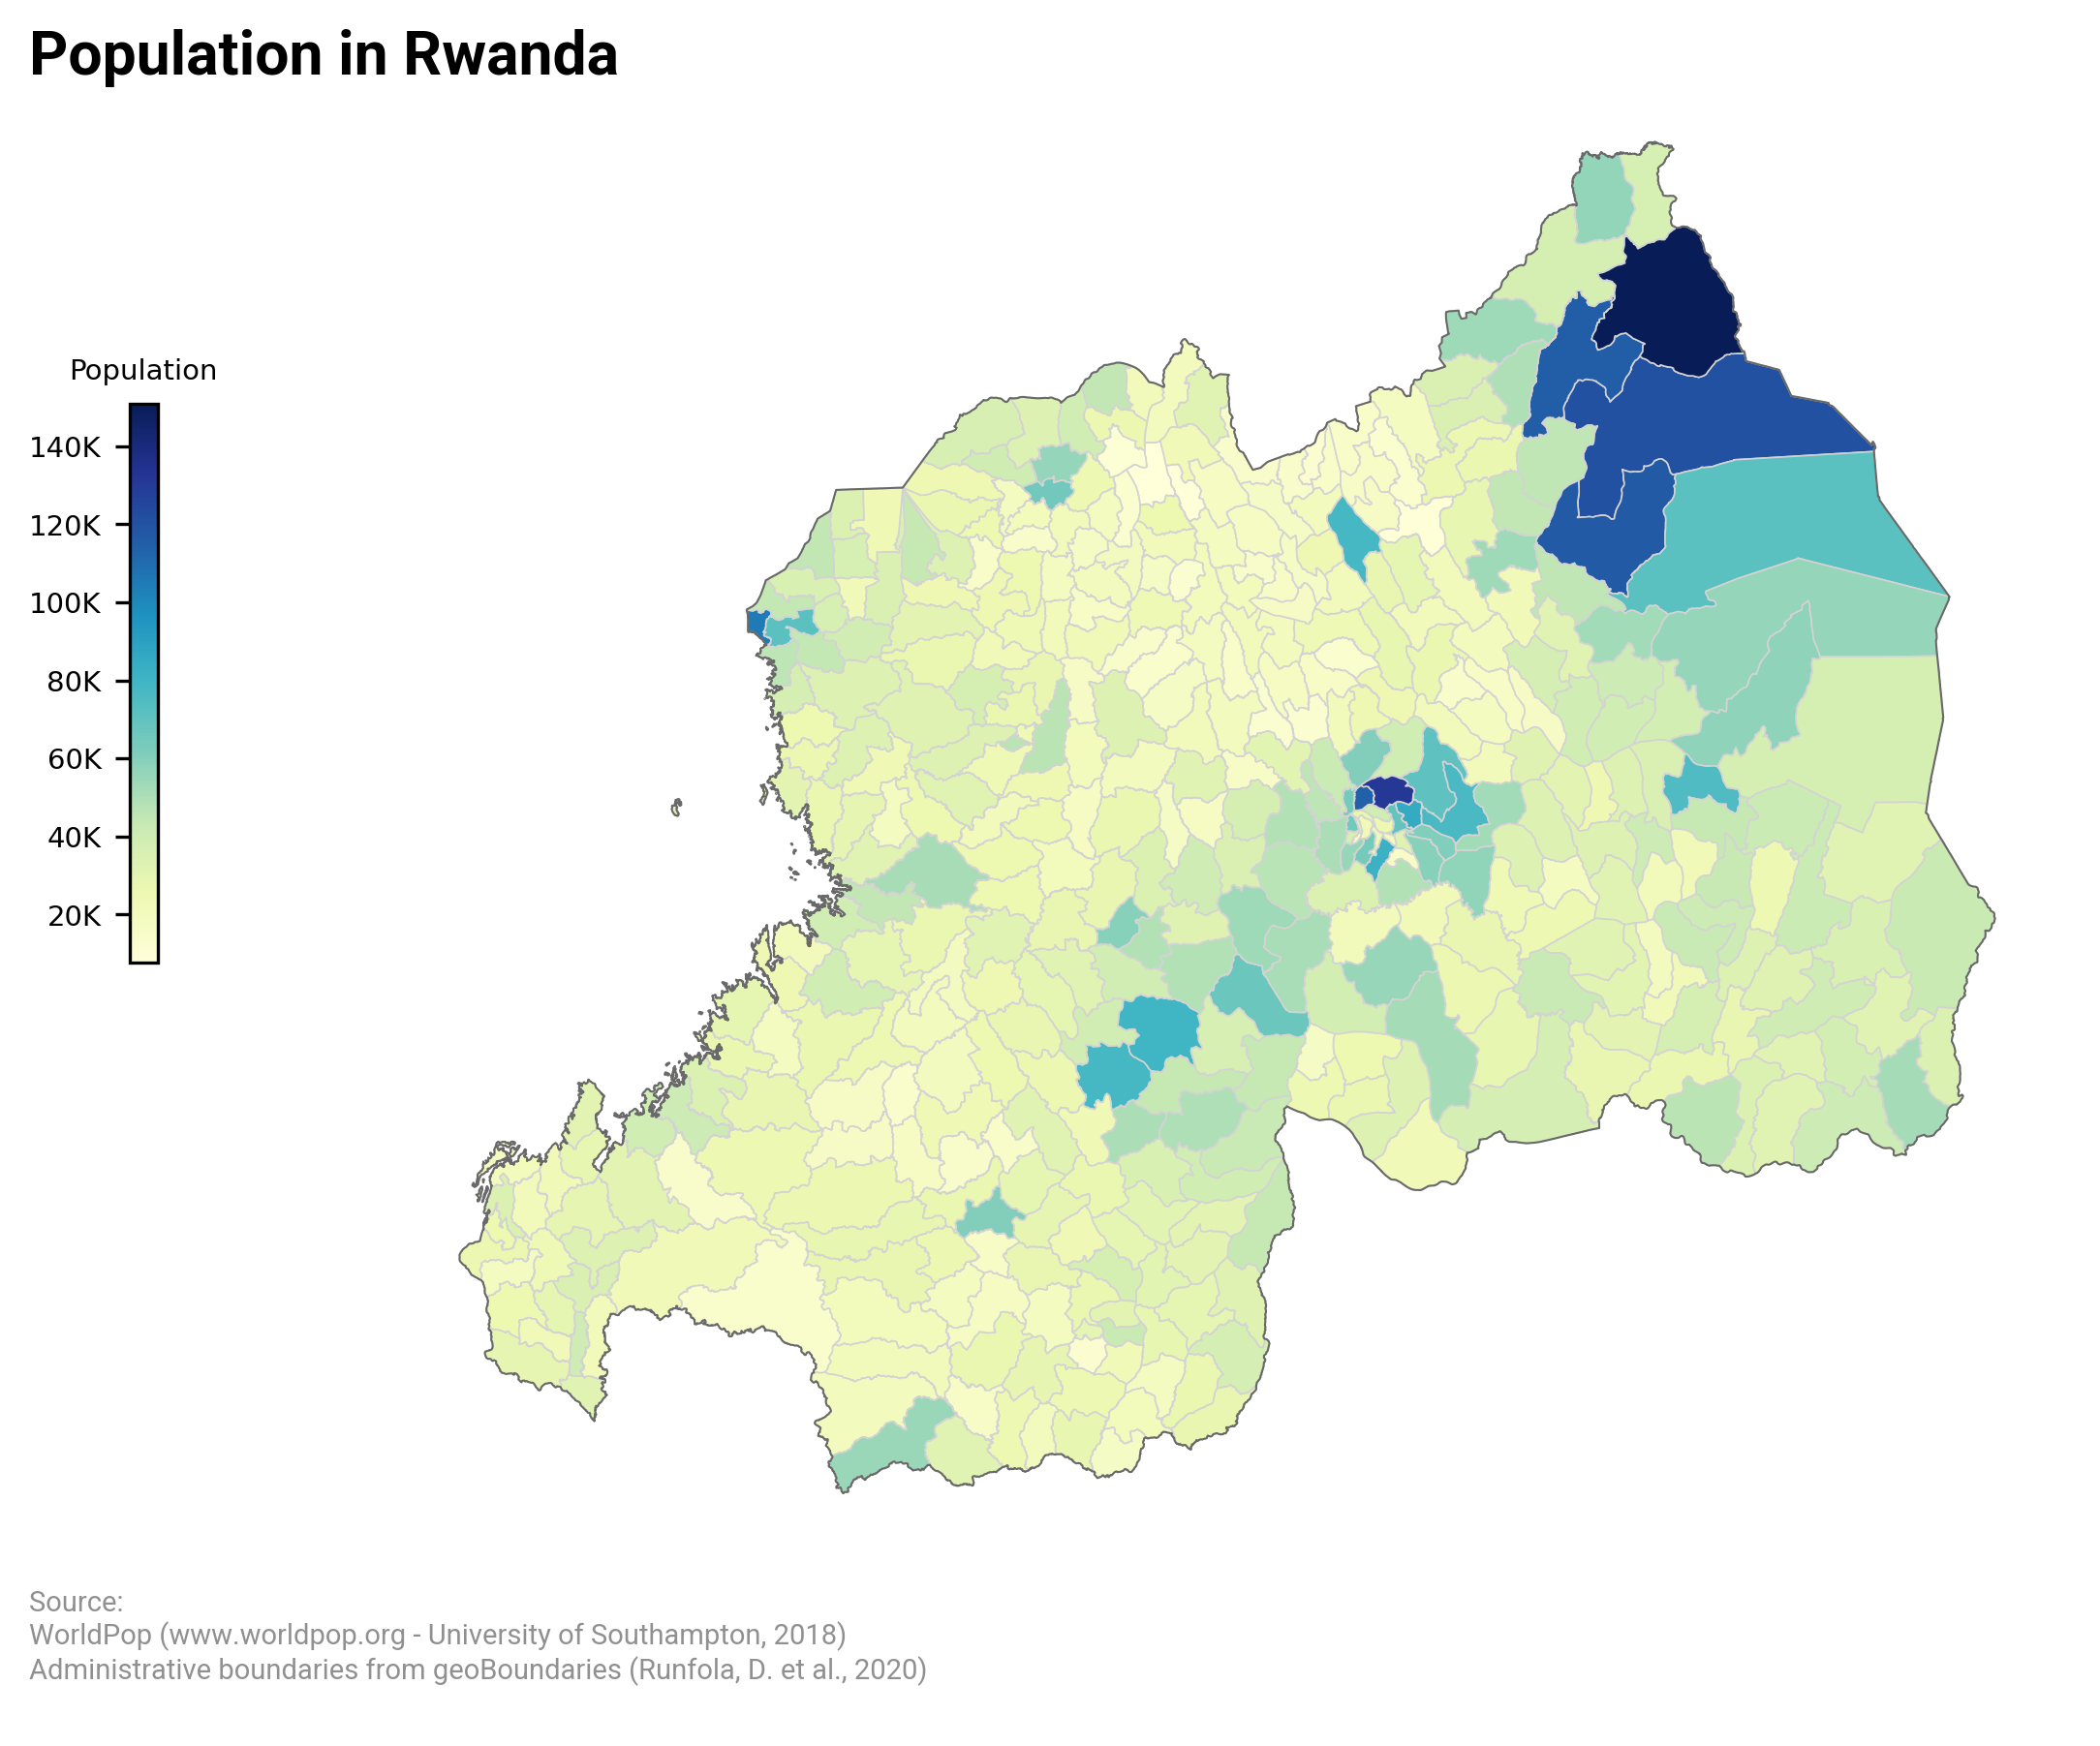

In [80]:
# @markdown ### Plot Asset Distribution
# @markdown ---

# @markdown ### Zoom to specific region
zoom_to_region = False # @param {type: "boolean"}
adm_level = "ADM1" # @param ["ADM1", "ADM2", "ADM3"]
adm_string = "Southern Province" # @param {type: "string"}

# @markdown ---
# @markdown ### Overlay points
overlay_points = False # @param {type: "boolean"}
clustering = False # @param {type: "boolean"}
clustering_distance = 10 # @param {type: "number"}
points = "ACLED" # @param ["ACLED", "UCDP", "OSM"]
points_column = "disorder_type" # @param ["disorder_type", "event_type", "type_of_violence", "sub_event_type", "category"]
# @markdown ---

zoom_to = None
if zoom_to_region:
   zoom_to = {adm_level: adm_string}

ax, x = geoplot.plot_choropleth(
    var="worldpop",
    kwargs={
        "legend_type": "colorbar",
        "legend_y": 0.445,
    },
    zoom_to=zoom_to
)

if overlay_points:
  geoplot.plot_points(
      points_column,
      dataset=points.lower(),
      clustering=clustering,
      kwargs={
          "alpha": 1,
          "legend_y": 0.30,
          "markerscale": 1,
          "cmap": "tab10"
      },
      zoom_to=zoom_to,
      distance=clustering_distance,
      ax=ax, xpos=x,
  );

## Plot Conflict Stats

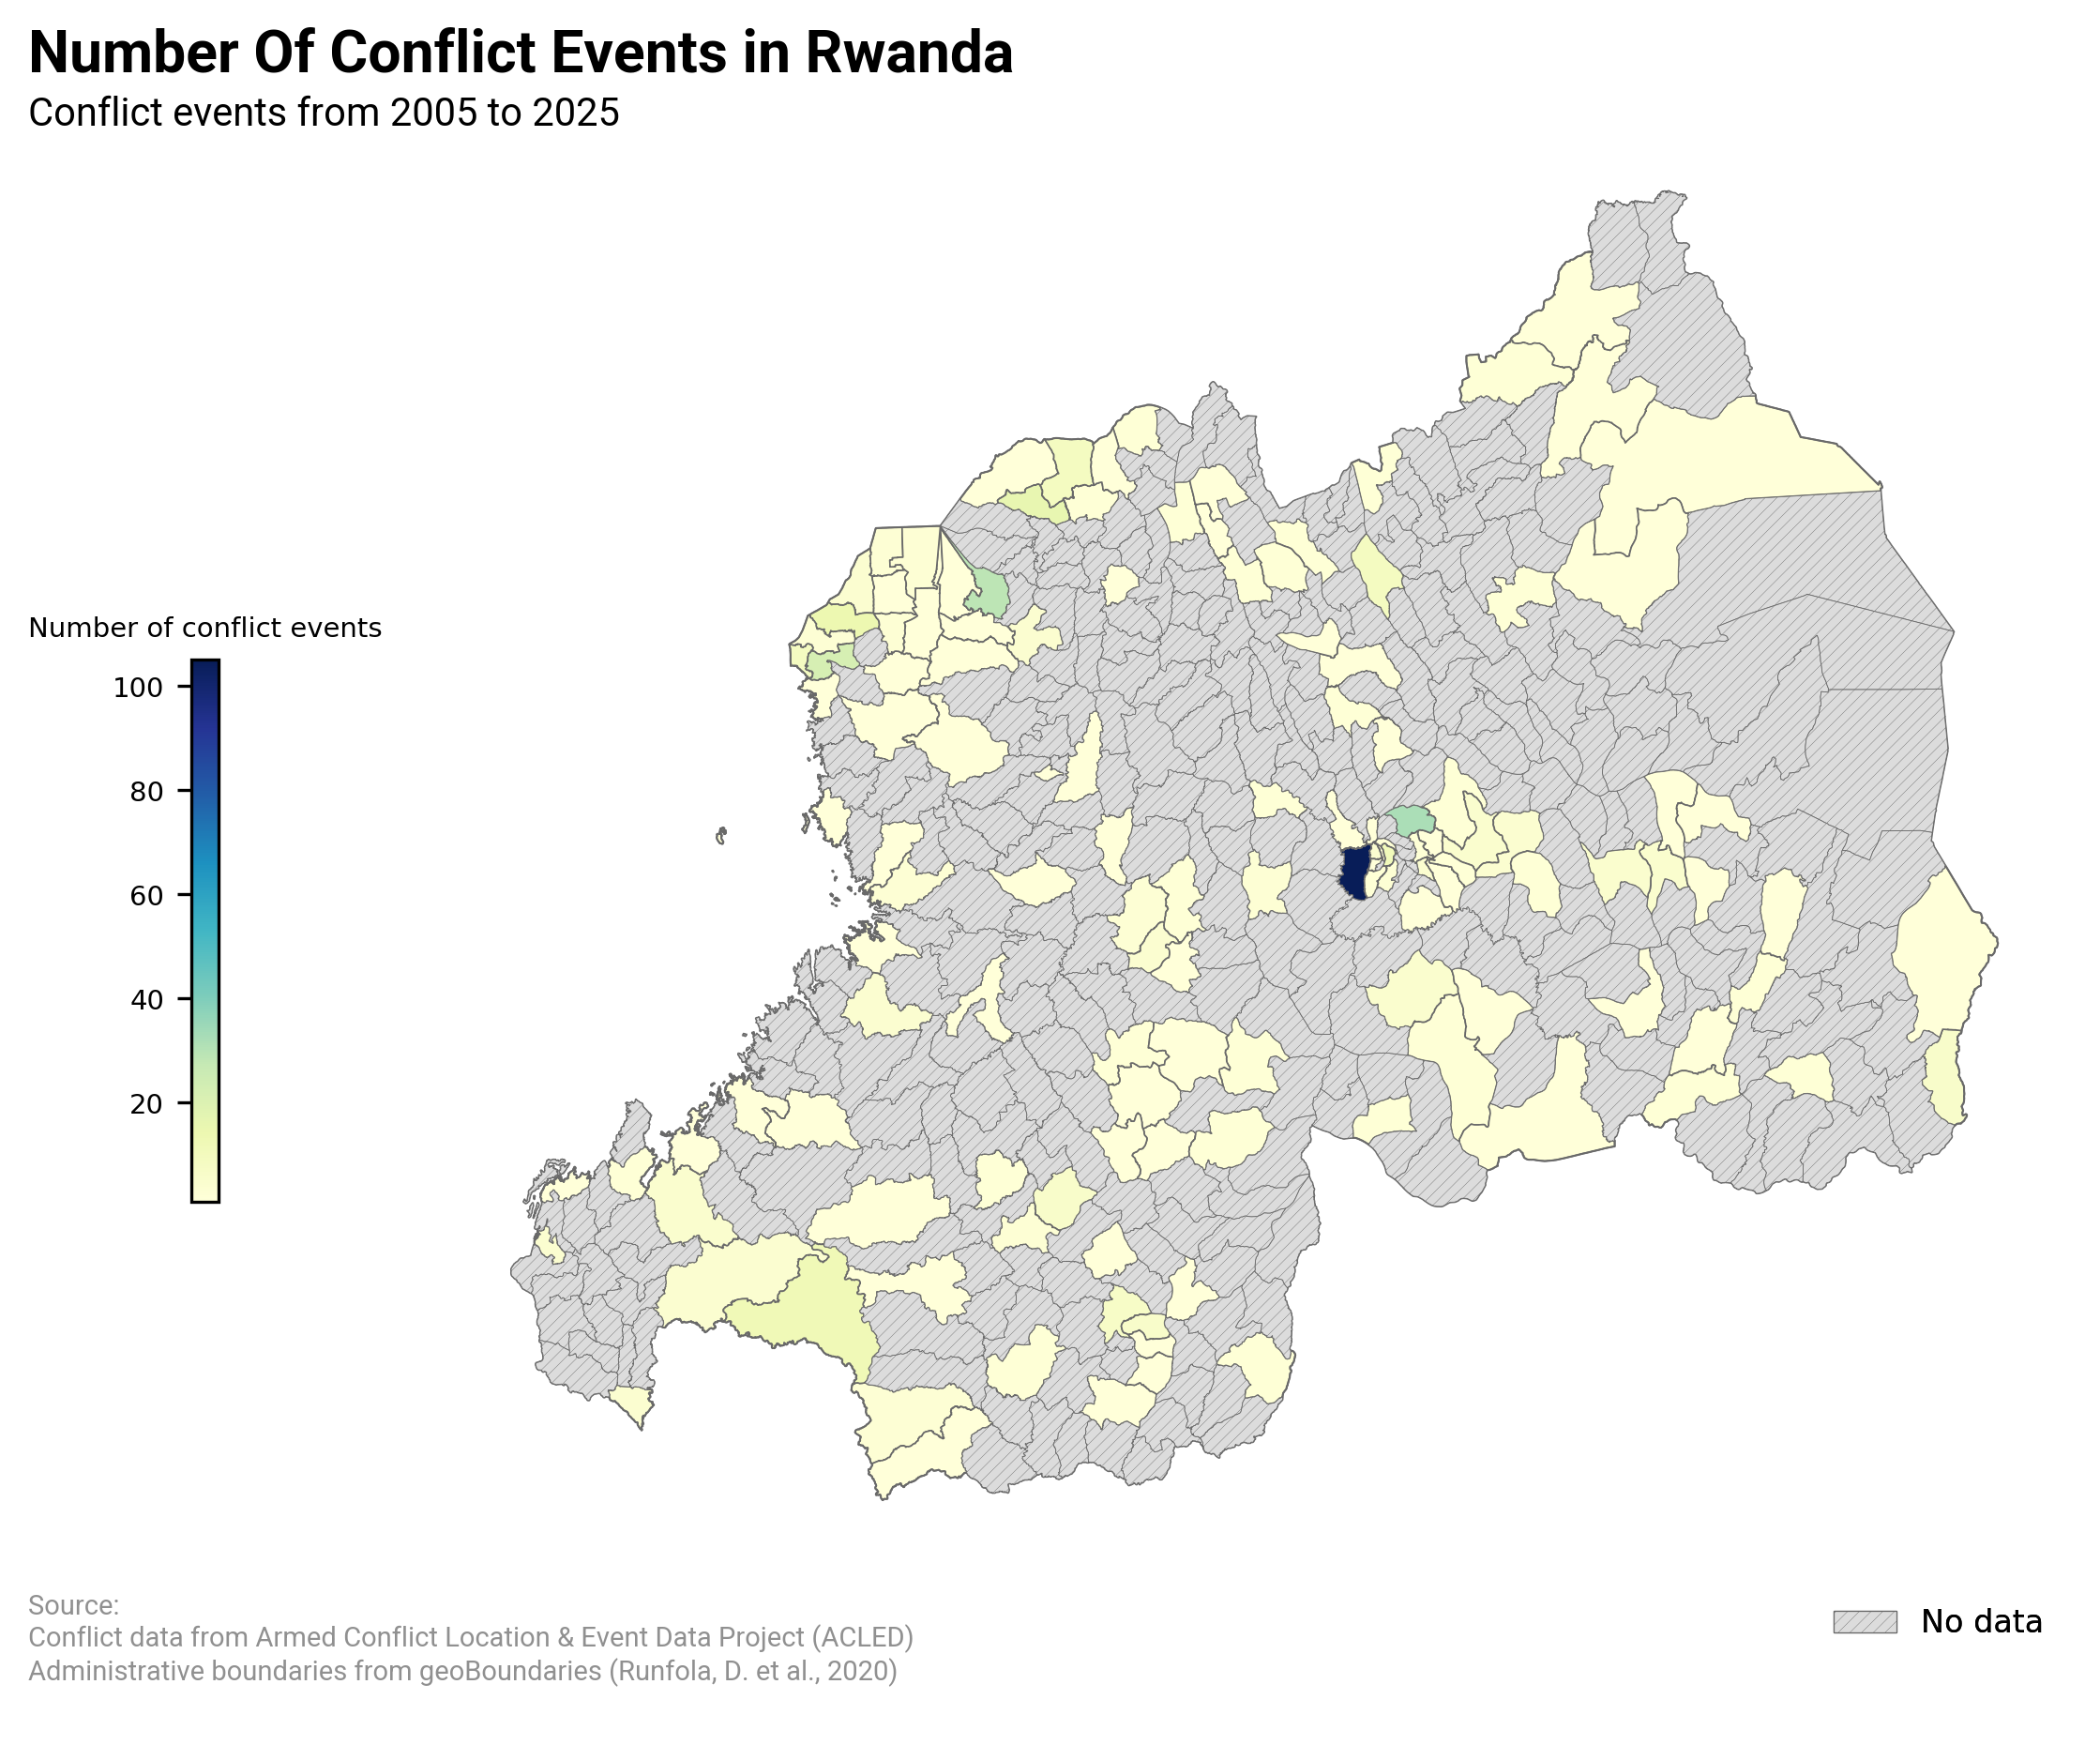

In [82]:
# @markdown ### Plot Conflict statistics
conflict_data_source = "ACLED" # @param ["ACLED", "UCDP"]
conflict_column = "conflict_count" # @param ["conflict_count", "fatalities", "fatalities_per_conflict"]

# @markdown ---
# @markdown ### Zoom to a specific region
zoom_to_region = False # @param {type: "boolean"}
adm_level = "ADM1" # @param ["ADM1", "ADM2", "ADM3"]
adm_string = "Southern Province" # @param {type: "string"}
# @markdown ---

# @markdown ### Overlay points
overlay_points = False # @param {type: "boolean"}
clustering = False # @param {type: "boolean"}
clustering_distance = 10 # @param {type: "number"}
points = "ACLED" # @param ["ACLED", "UCDP", "OSM"]
points_column = "disorder_type" # @param ["disorder_type", "event_type", "type_of_violence", "sub_event_type", "category"]
# @markdown ---

zoom_to = None
if zoom_to_region:
   zoom_to = {adm_level: adm_string}

ax, x = geoplot.plot_choropleth(
    var=f"{conflict_data_source.lower()}_{conflict_column}",
    kwargs={
        "legend_type": "colorbar",
        "palette_name": "Reds",
        "edgecolor": "dimgray"
    },
    zoom_to=zoom_to
)

if overlay_points:
  geoplot.plot_points(
      points_column,
      dataset=points.lower(),
      clustering=clustering,
      kwargs={
          "alpha": 1,
          "legend_y": 0.30,
          "markerscale": 1,
          "cmap": "tab10"
      },
      zoom_to=zoom_to,
      distance=clustering_distance,
      ax=ax, xpos=x,
  );

## Plot Conflict Exposure

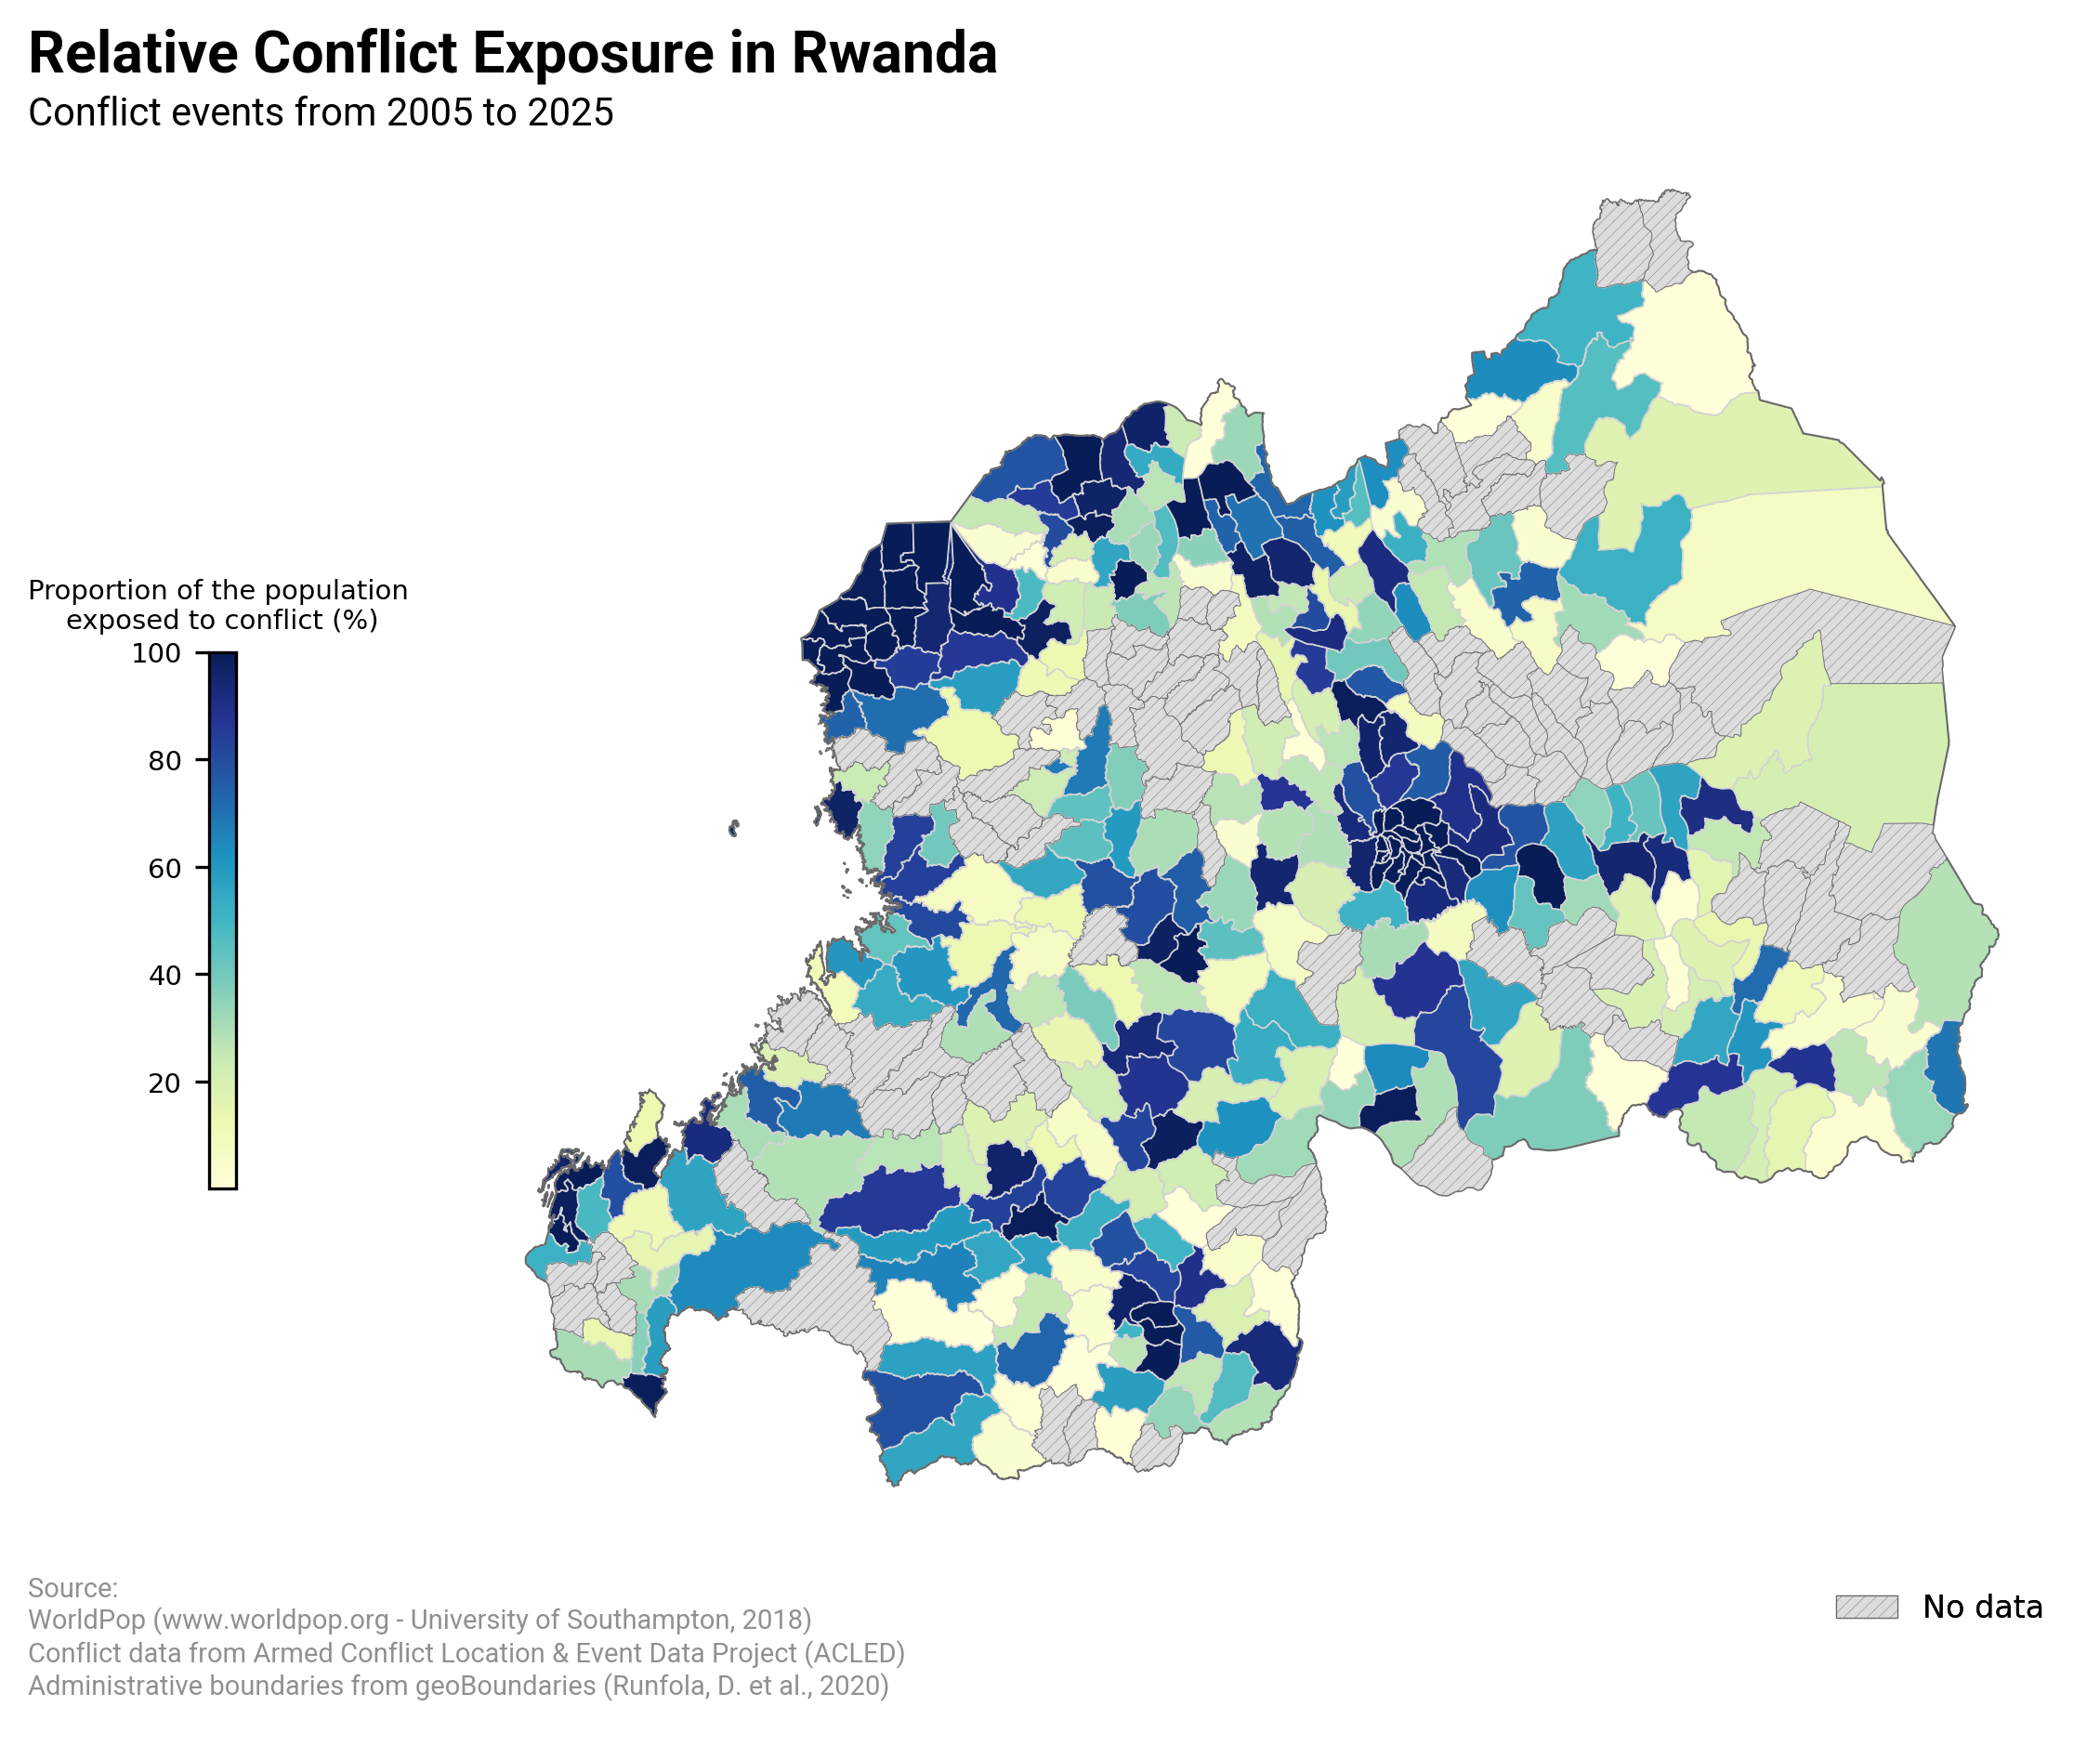

In [31]:
# @markdown ### Plot Conflict Exposure
conflict_exposure_source = "ACLED (WBG calculation)" # @param ["ACLED (population_best)", "ACLED (WBG calculation)", "UCDP"]
exposure = "relative" # @param ["absolute", "relative"]

source = data_utils.get_conflict_source(dm, conflict_exposure_source)
exposure = data_utils.get_exposure(dm, exposure)

# @markdown ---
# @markdown ### Zoom to a specific region
zoom_to_region = False # @param {type: "boolean"}
adm_level = "ADM1" # @param ["ADM1", "ADM2", "ADM3"]
adm_string = "Southern Province" # @param {type: "string"}
# @markdown ---

# @markdown ### Overlay points
overlay_points = False # @param {type: "boolean"}
clustering = False # @param {type: "boolean"}
clustering_distance = 10 # @param {type: "number"}
points = "ACLED" # @param ["ACLED", "UCDP", "OSM"]
points_column = "disorder_type" # @param ["disorder_type", "event_type", "type_of_violence", "sub_event_type", "category"]
# @markdown ---

zoom_to = None
if zoom_to_region:
   zoom_to = {adm_level: adm_string}

ax, x = geoplot.plot_choropleth(
    var=f"{source}_{exposure}",
    kwargs={"legend_type": "colorbar"},
    zoom_to=zoom_to
);

if overlay_points:
  geoplot.plot_points(
      points_column,
      dataset=points.lower(),
      clustering=clustering,
      kwargs={
          "alpha": 1,
          "legend_y": 0.30,
          "markerscale": 1,
          "cmap": "tab10"
      },
      zoom_to=zoom_to,
      distance=clustering_distance,
      ax=ax, xpos=x,
  );

## Map Exposure to a Single Hazard

/usr/local/lib/python3.12/dist-packages/dfcv_colocation_mapping/map_utils.py:319: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=config["cbar_fontsize"])


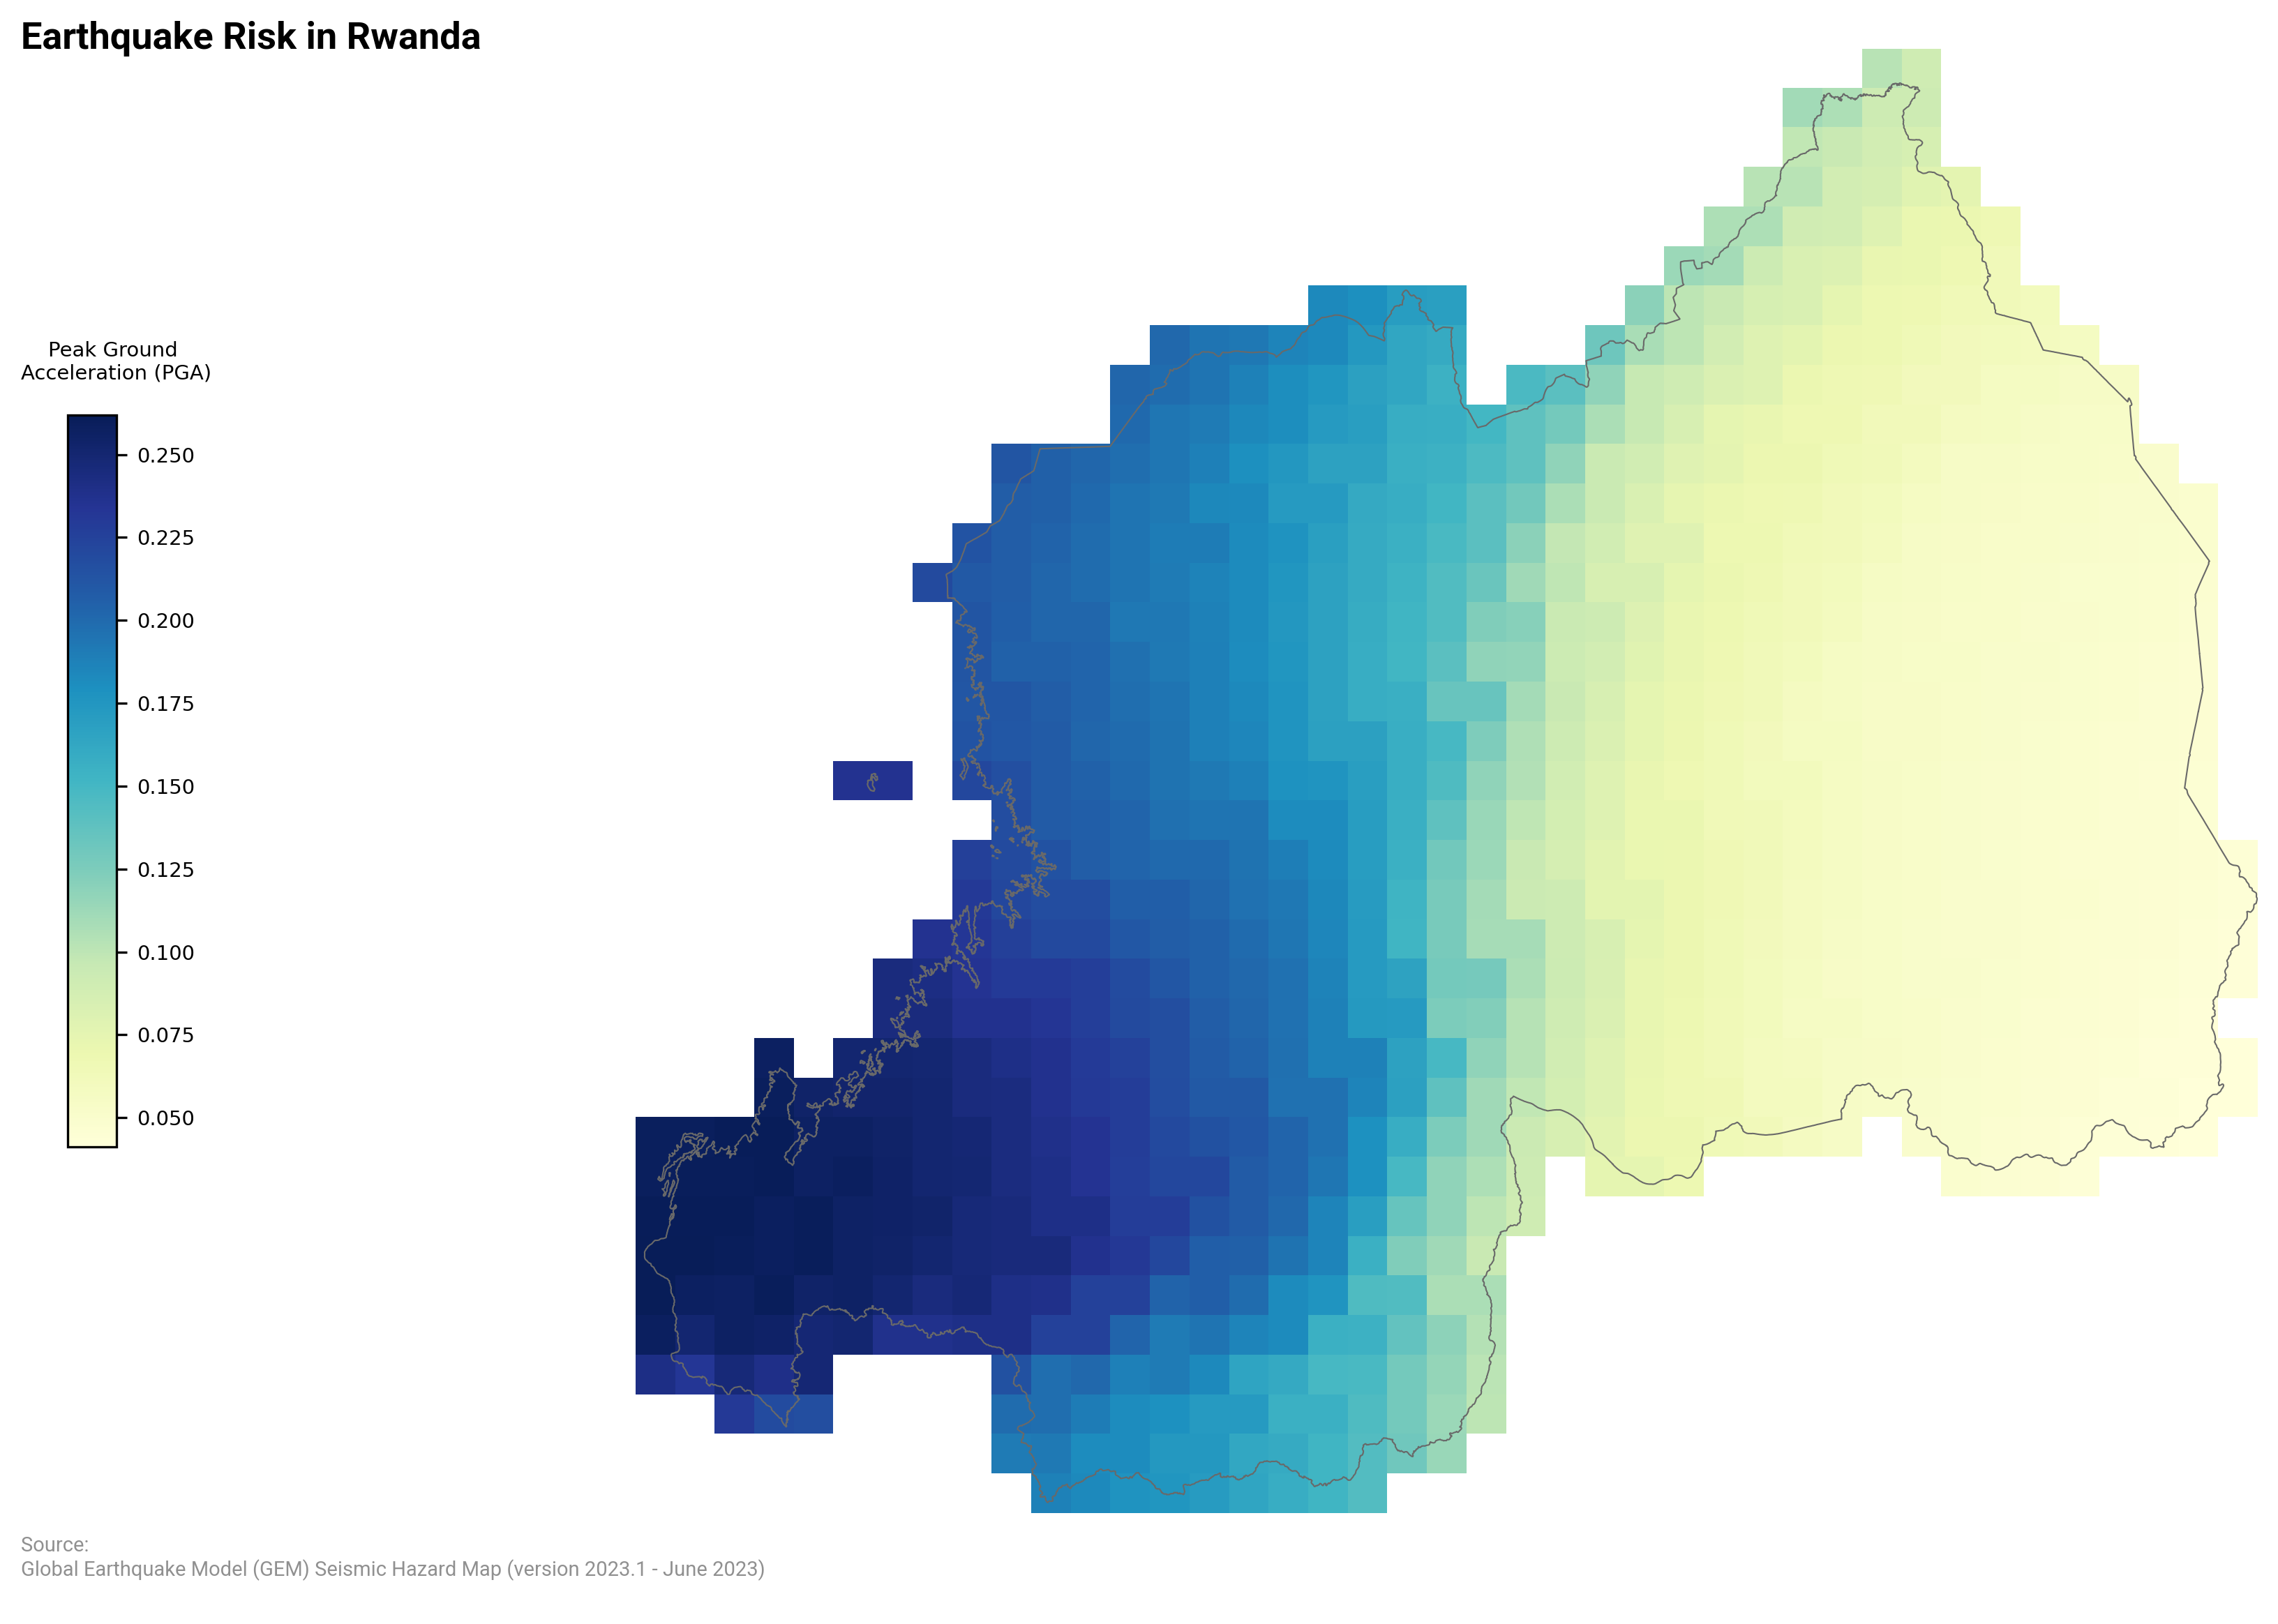

In [40]:
hazard = "earthquake" # @param ["earthquake", "landslide", "cyclone", "drought", "heat_stress", "fluvial_flood", "wildfire"]
ax = geoplot.plot_raster(hazard);

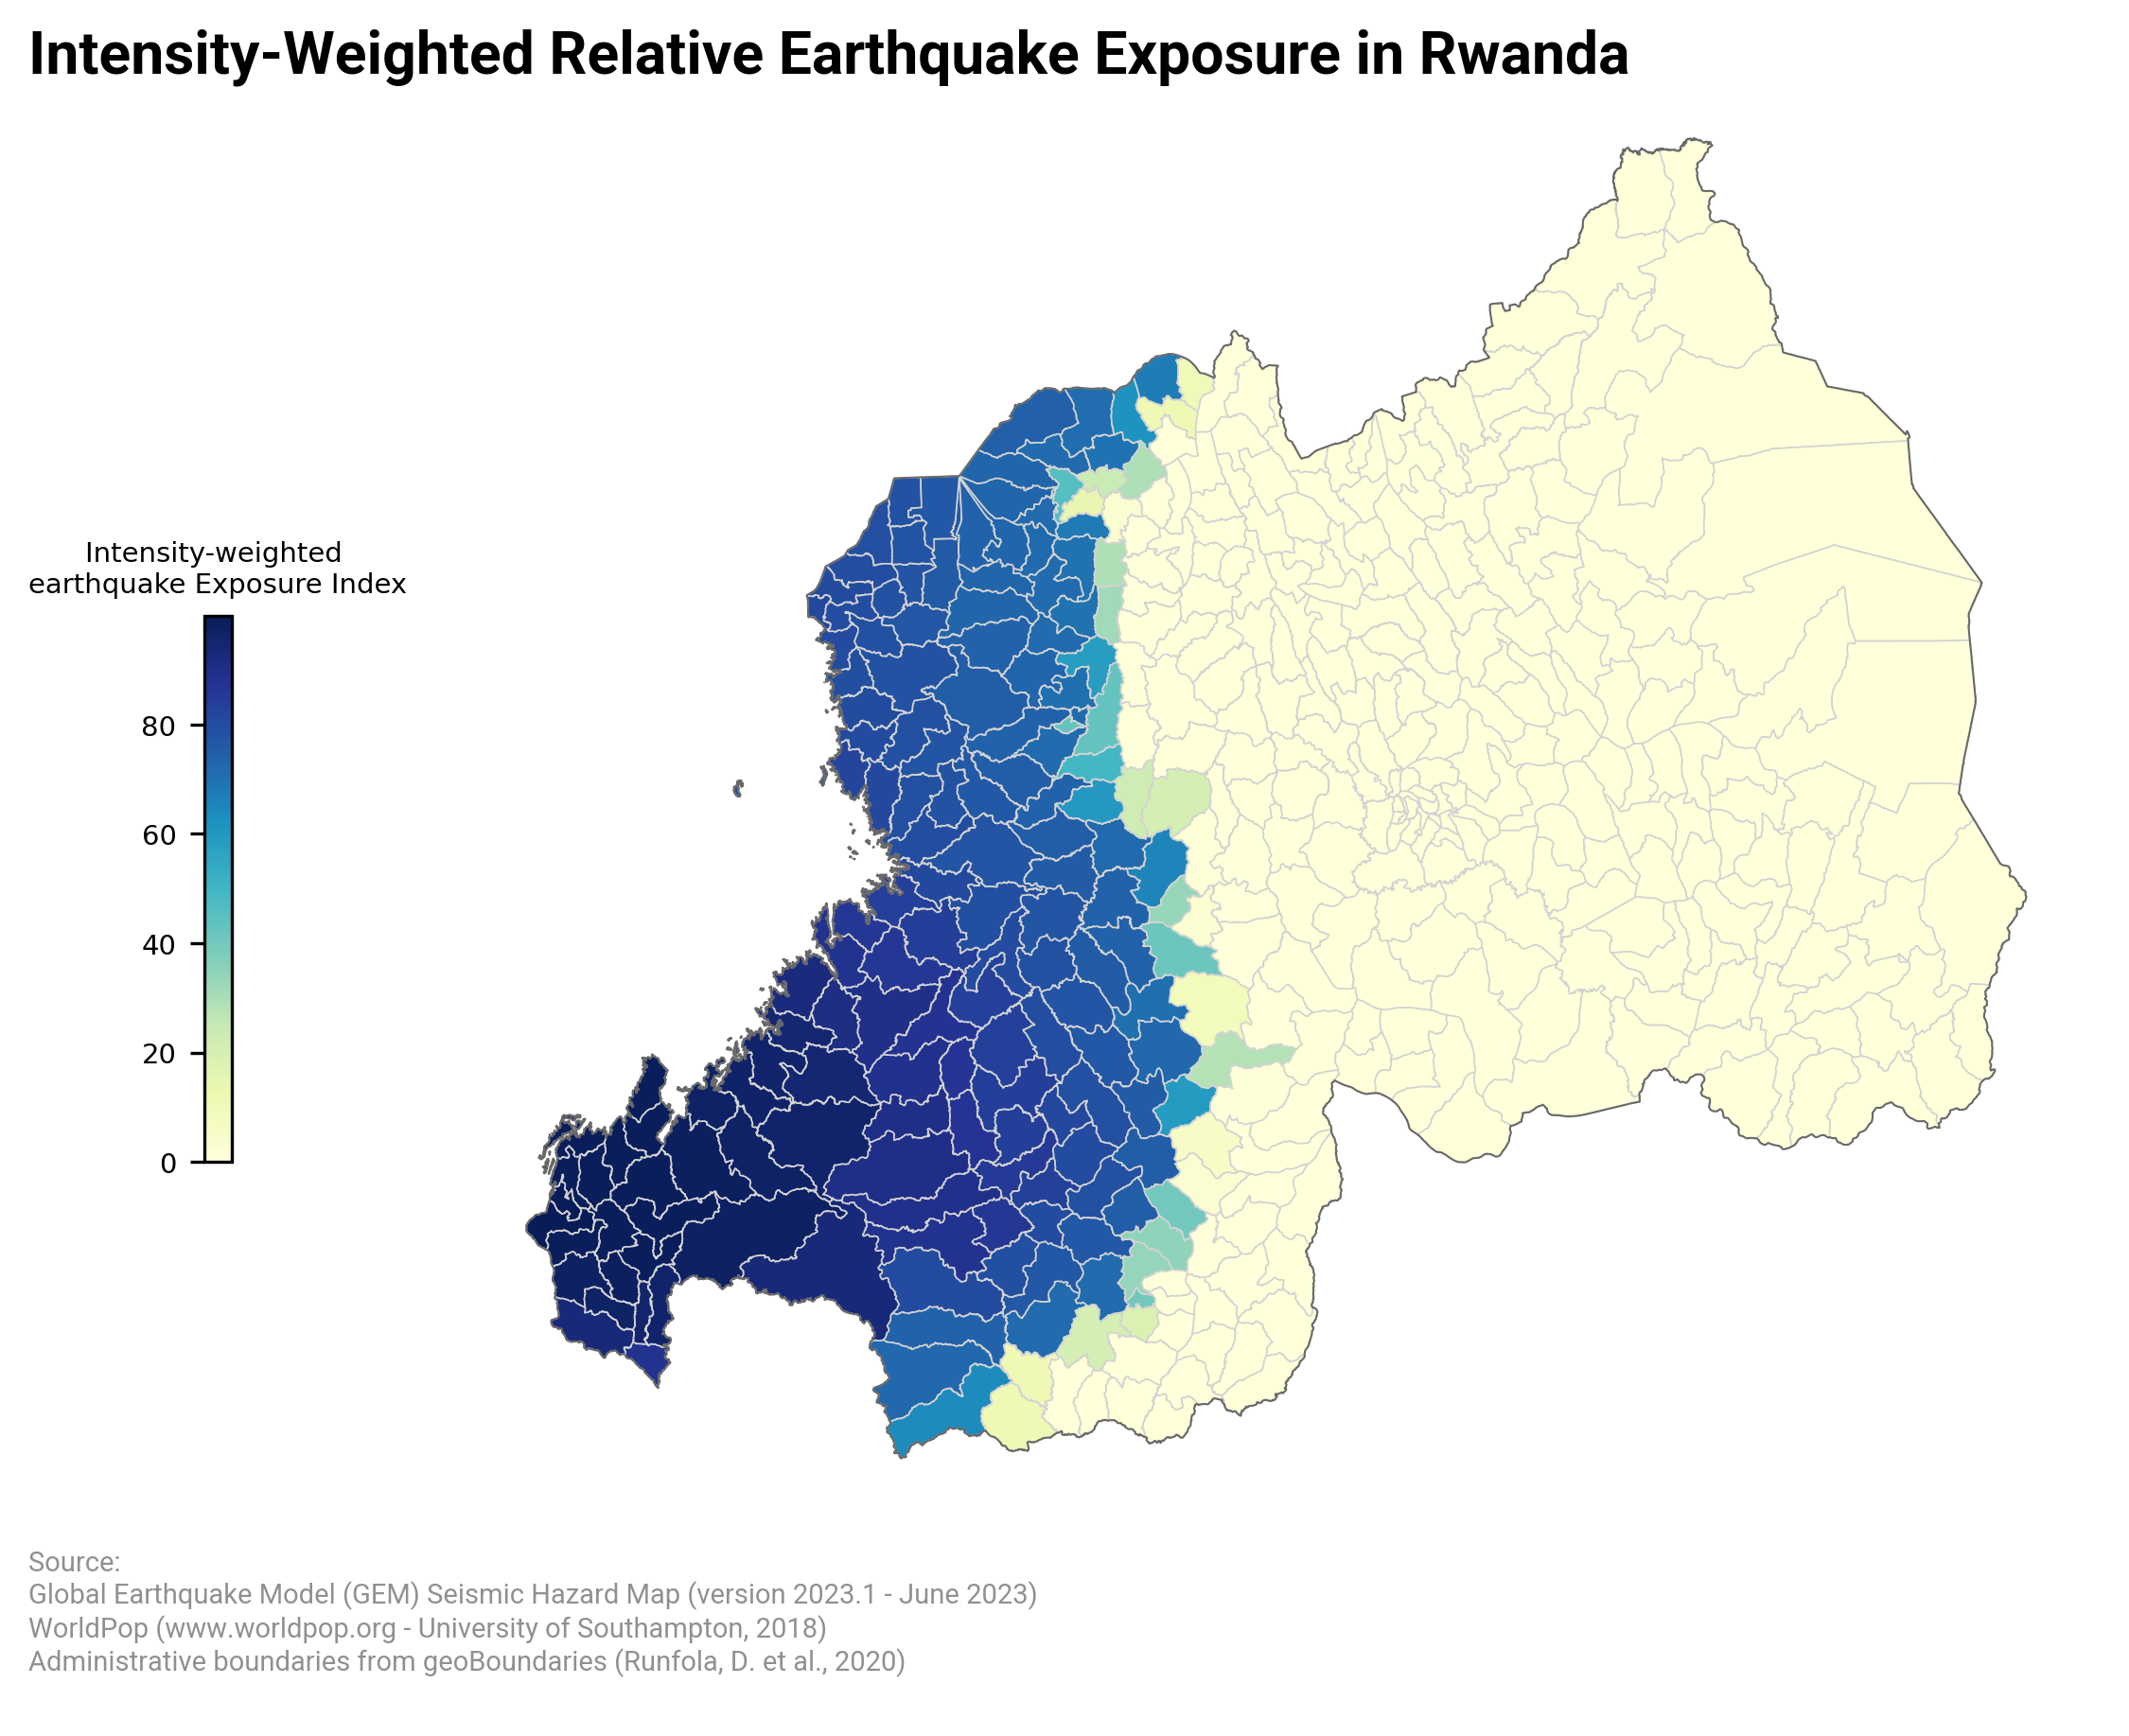

In [83]:
# @markdown ### Plot Hazard Exposure
hazard = "earthquake" # @param ["earthquake", "landslide", "cyclone", "drought", "heat_stress", "fluvial_flood", "wildfire"]
exposure = "intensity_weighted_relative" # @param ["absolute", "relative", "intensity_weighted_relative"]
exposure = data_utils.get_exposure(dm, exposure)

# @markdown ---
# @markdown ### Zoom to a specific region
zoom_to_region = False # @param {type: "boolean"}
adm_level = "ADM1" # @param ["ADM1", "ADM2", "ADM3"]
adm_string = "Southern Province" # @param {type: "string"}
# @markdown ---

# @markdown ### Overlay points
overlay_points = False # @param {type: "boolean"}
clustering = False # @param {type: "boolean"}
clustering_distance = 10 # @param {type: "number"}
points = "ACLED" # @param ["ACLED", "UCDP", "OSM"]
points_column = "disorder_type" # @param ["disorder_type", "event_type", "type_of_violence", "sub_event_type", "category"]
# @markdown ---

zoom_to = None
if zoom_to_region:
   zoom_to = {adm_level: adm_string}

ax, x = geoplot.plot_choropleth(
    f"{hazard}_{dm.asset}_{exposure}",
    kwargs={"legend_type": "colorbar"},
    zoom_to=zoom_to
);

if overlay_points:
  geoplot.plot_points(
      points_column,
      dataset=points.lower(),
      clustering=clustering,
      kwargs={
          "alpha": 1,
          "legend_y": 0.30,
          "markerscale": 1,
          "cmap": "tab10"
      },
      zoom_to=zoom_to,
      distance=clustering_distance,
      ax=ax, xpos=x,
  );

## Multi-hazard Exposure Index

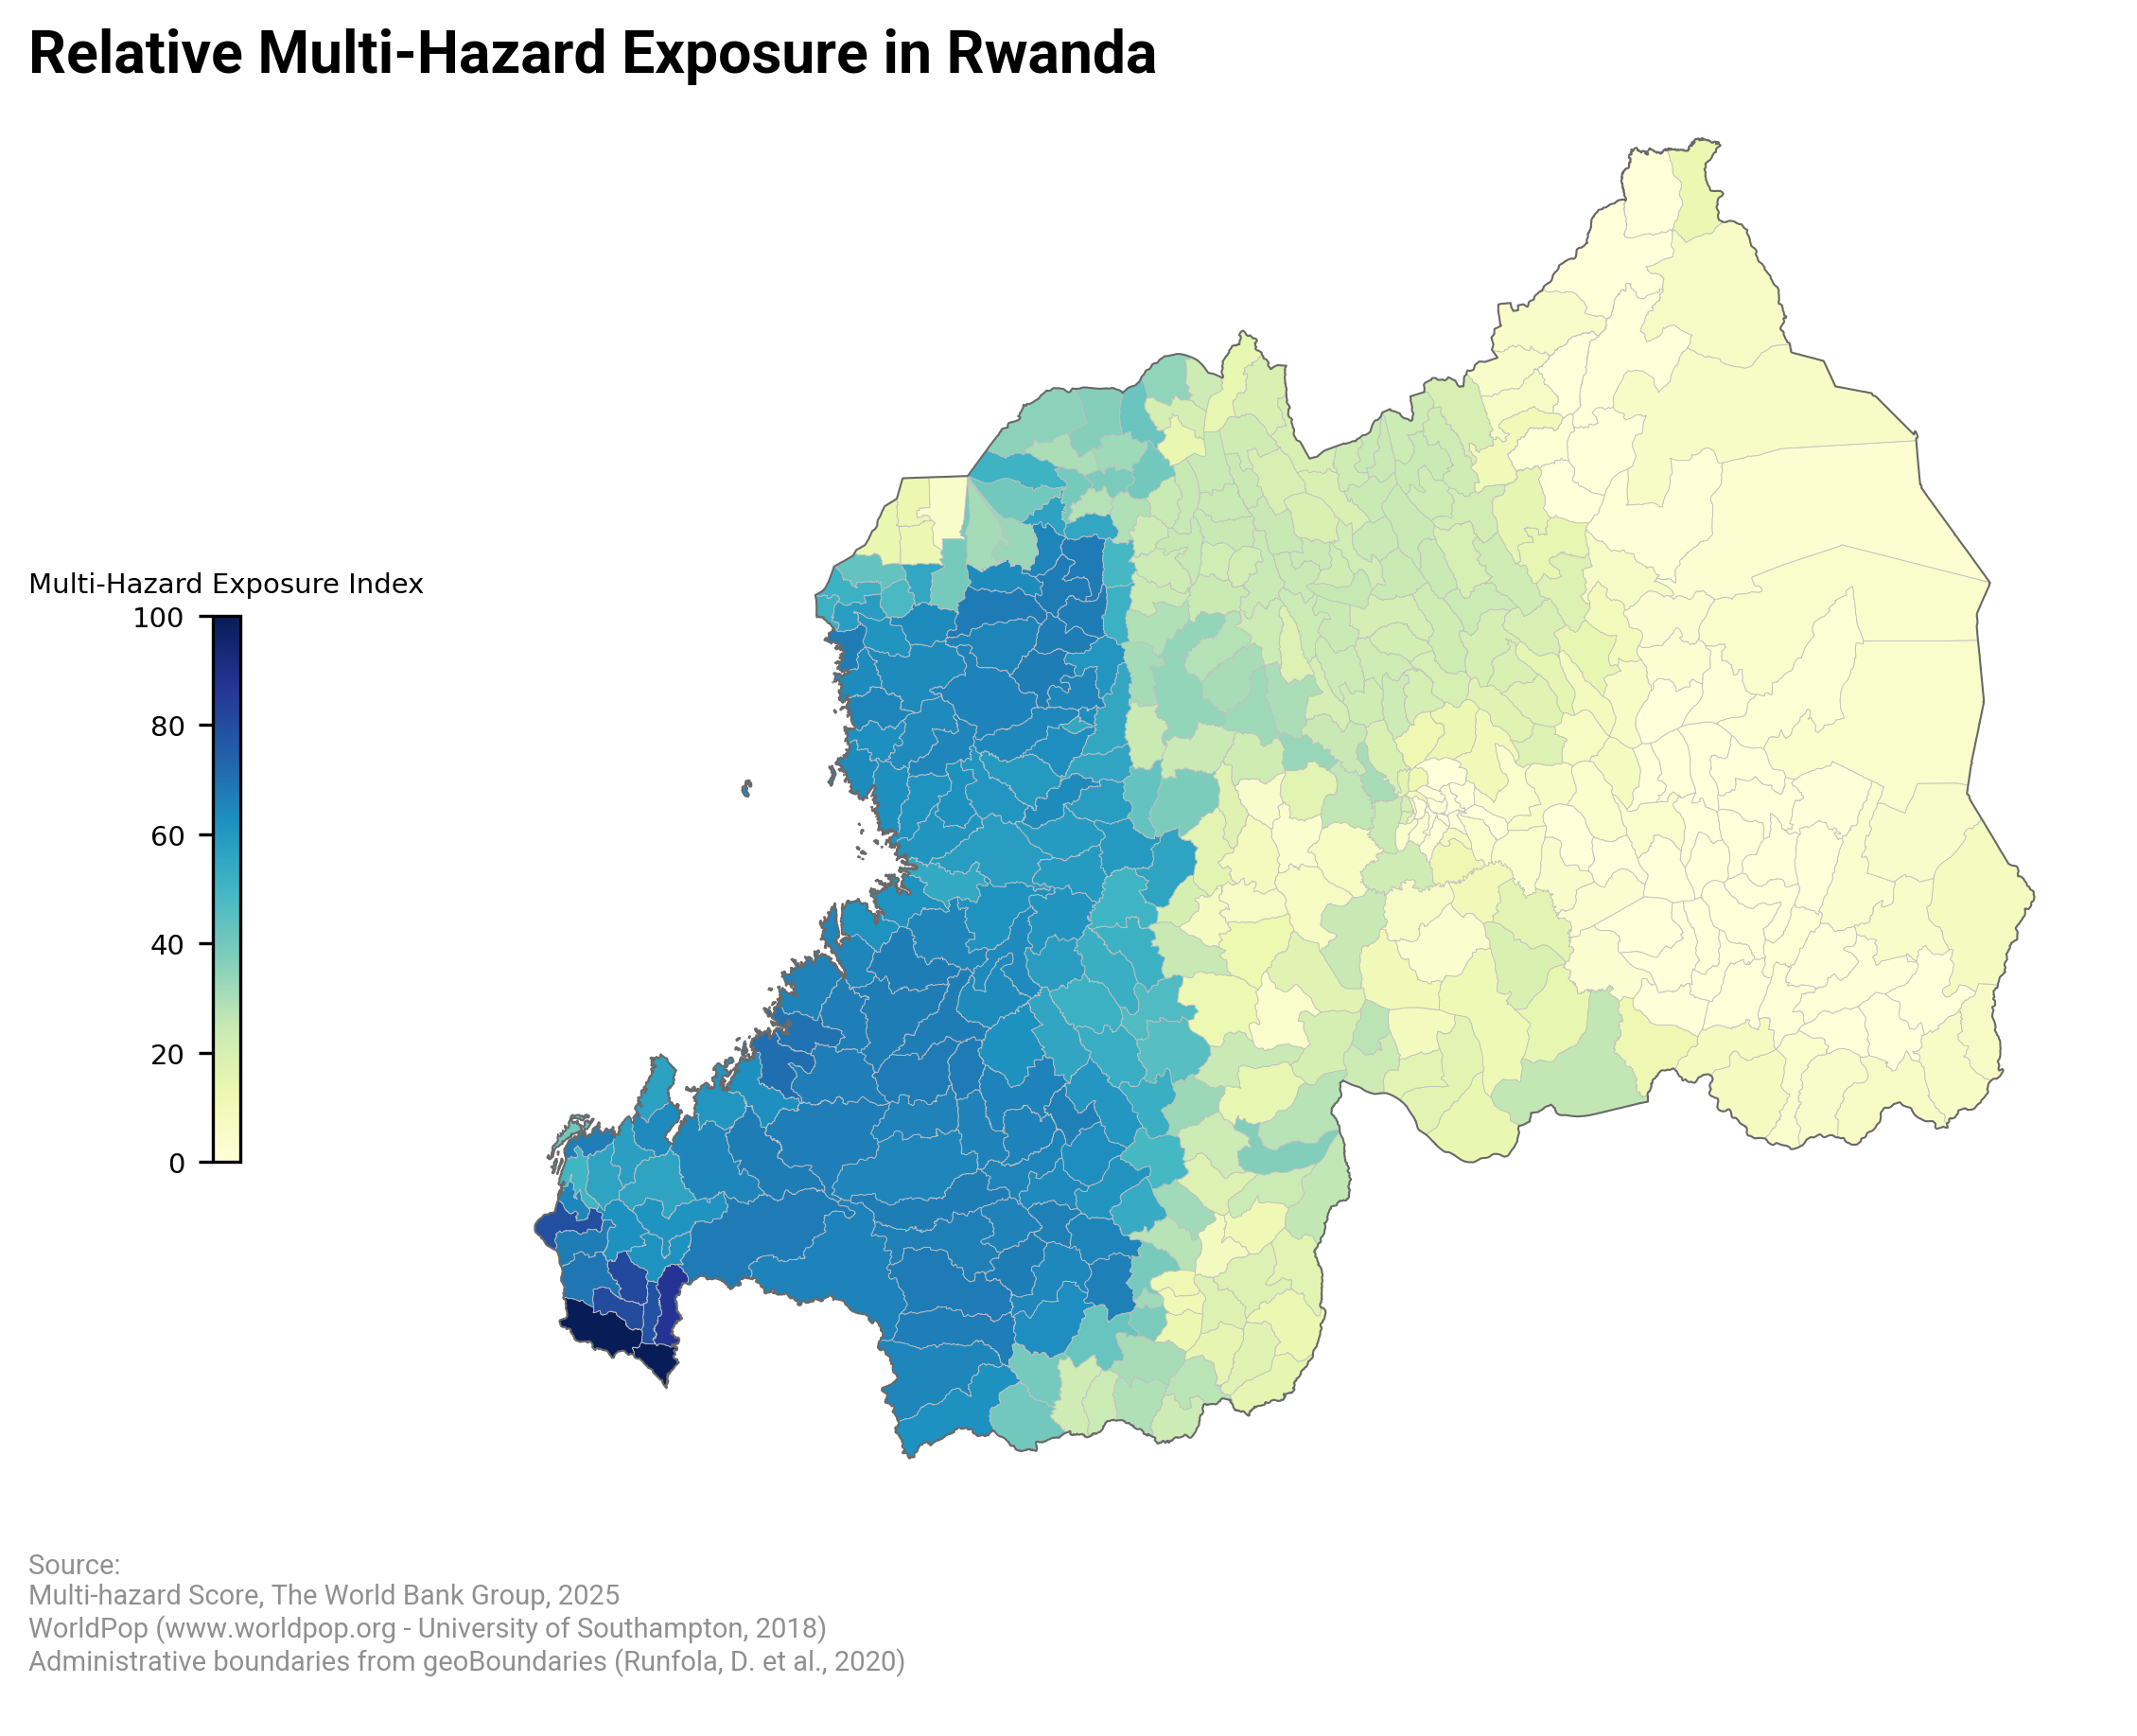

In [84]:
# @markdown ### Plot Multi-hazard Exposure
exposure = "relative" # @param ["relative", "intensity_weighted_relative"]
exposure = data_utils.get_exposure(dm, exposure)

hazard_category = "all" # @param ["all", "hydrological", "atmospheric", "geophysical", "biophysical"]

# @markdown ---
# @markdown ### Zoom to a specific region
zoom_to_region = False # @param {type: "boolean"}
adm_level = "ADM1" # @param ["ADM1", "ADM2", "ADM3"]
adm_string = "Southern Province" # @param {type: "string"}
# @markdown ---

# @markdown ### Overlay points
overlay_points = False # @param {type: "boolean"}
clustering = False # @param {type: "boolean"}
clustering_distance = 10 # @param {type: "number"}
points = "ACLED" # @param ["ACLED", "UCDP", "OSM"]
points_column = "disorder_type" # @param ["disorder_type", "event_type", "type_of_violence", "sub_event_type", "category"]
# @markdown ---

zoom_to = None
if zoom_to_region:
   zoom_to = {adm_level: adm_string}

ax, x = geoplot.plot_choropleth(
    var=f"mhs_{hazard_category}_{dm.asset}_{exposure}",
    kwargs={
        "legend_type": "colorbar",
        "edgecolor": "silver",
        "linewidth": 0.2
    },
    zoom_to=zoom_to
);

if overlay_points:
  geoplot.plot_points(
      points_column,
      dataset=points.lower(),
      clustering=clustering,
      kwargs={
          "alpha": 1,
          "legend_y": 0.30,
          "markerscale": 1,
          "cmap": "tab10"
      },
      zoom_to=zoom_to,
      distance=clustering_distance,
      ax=ax, xpos=x,
  );

## Generating Multi-hazard Conflict Exposure Choropleth Maps

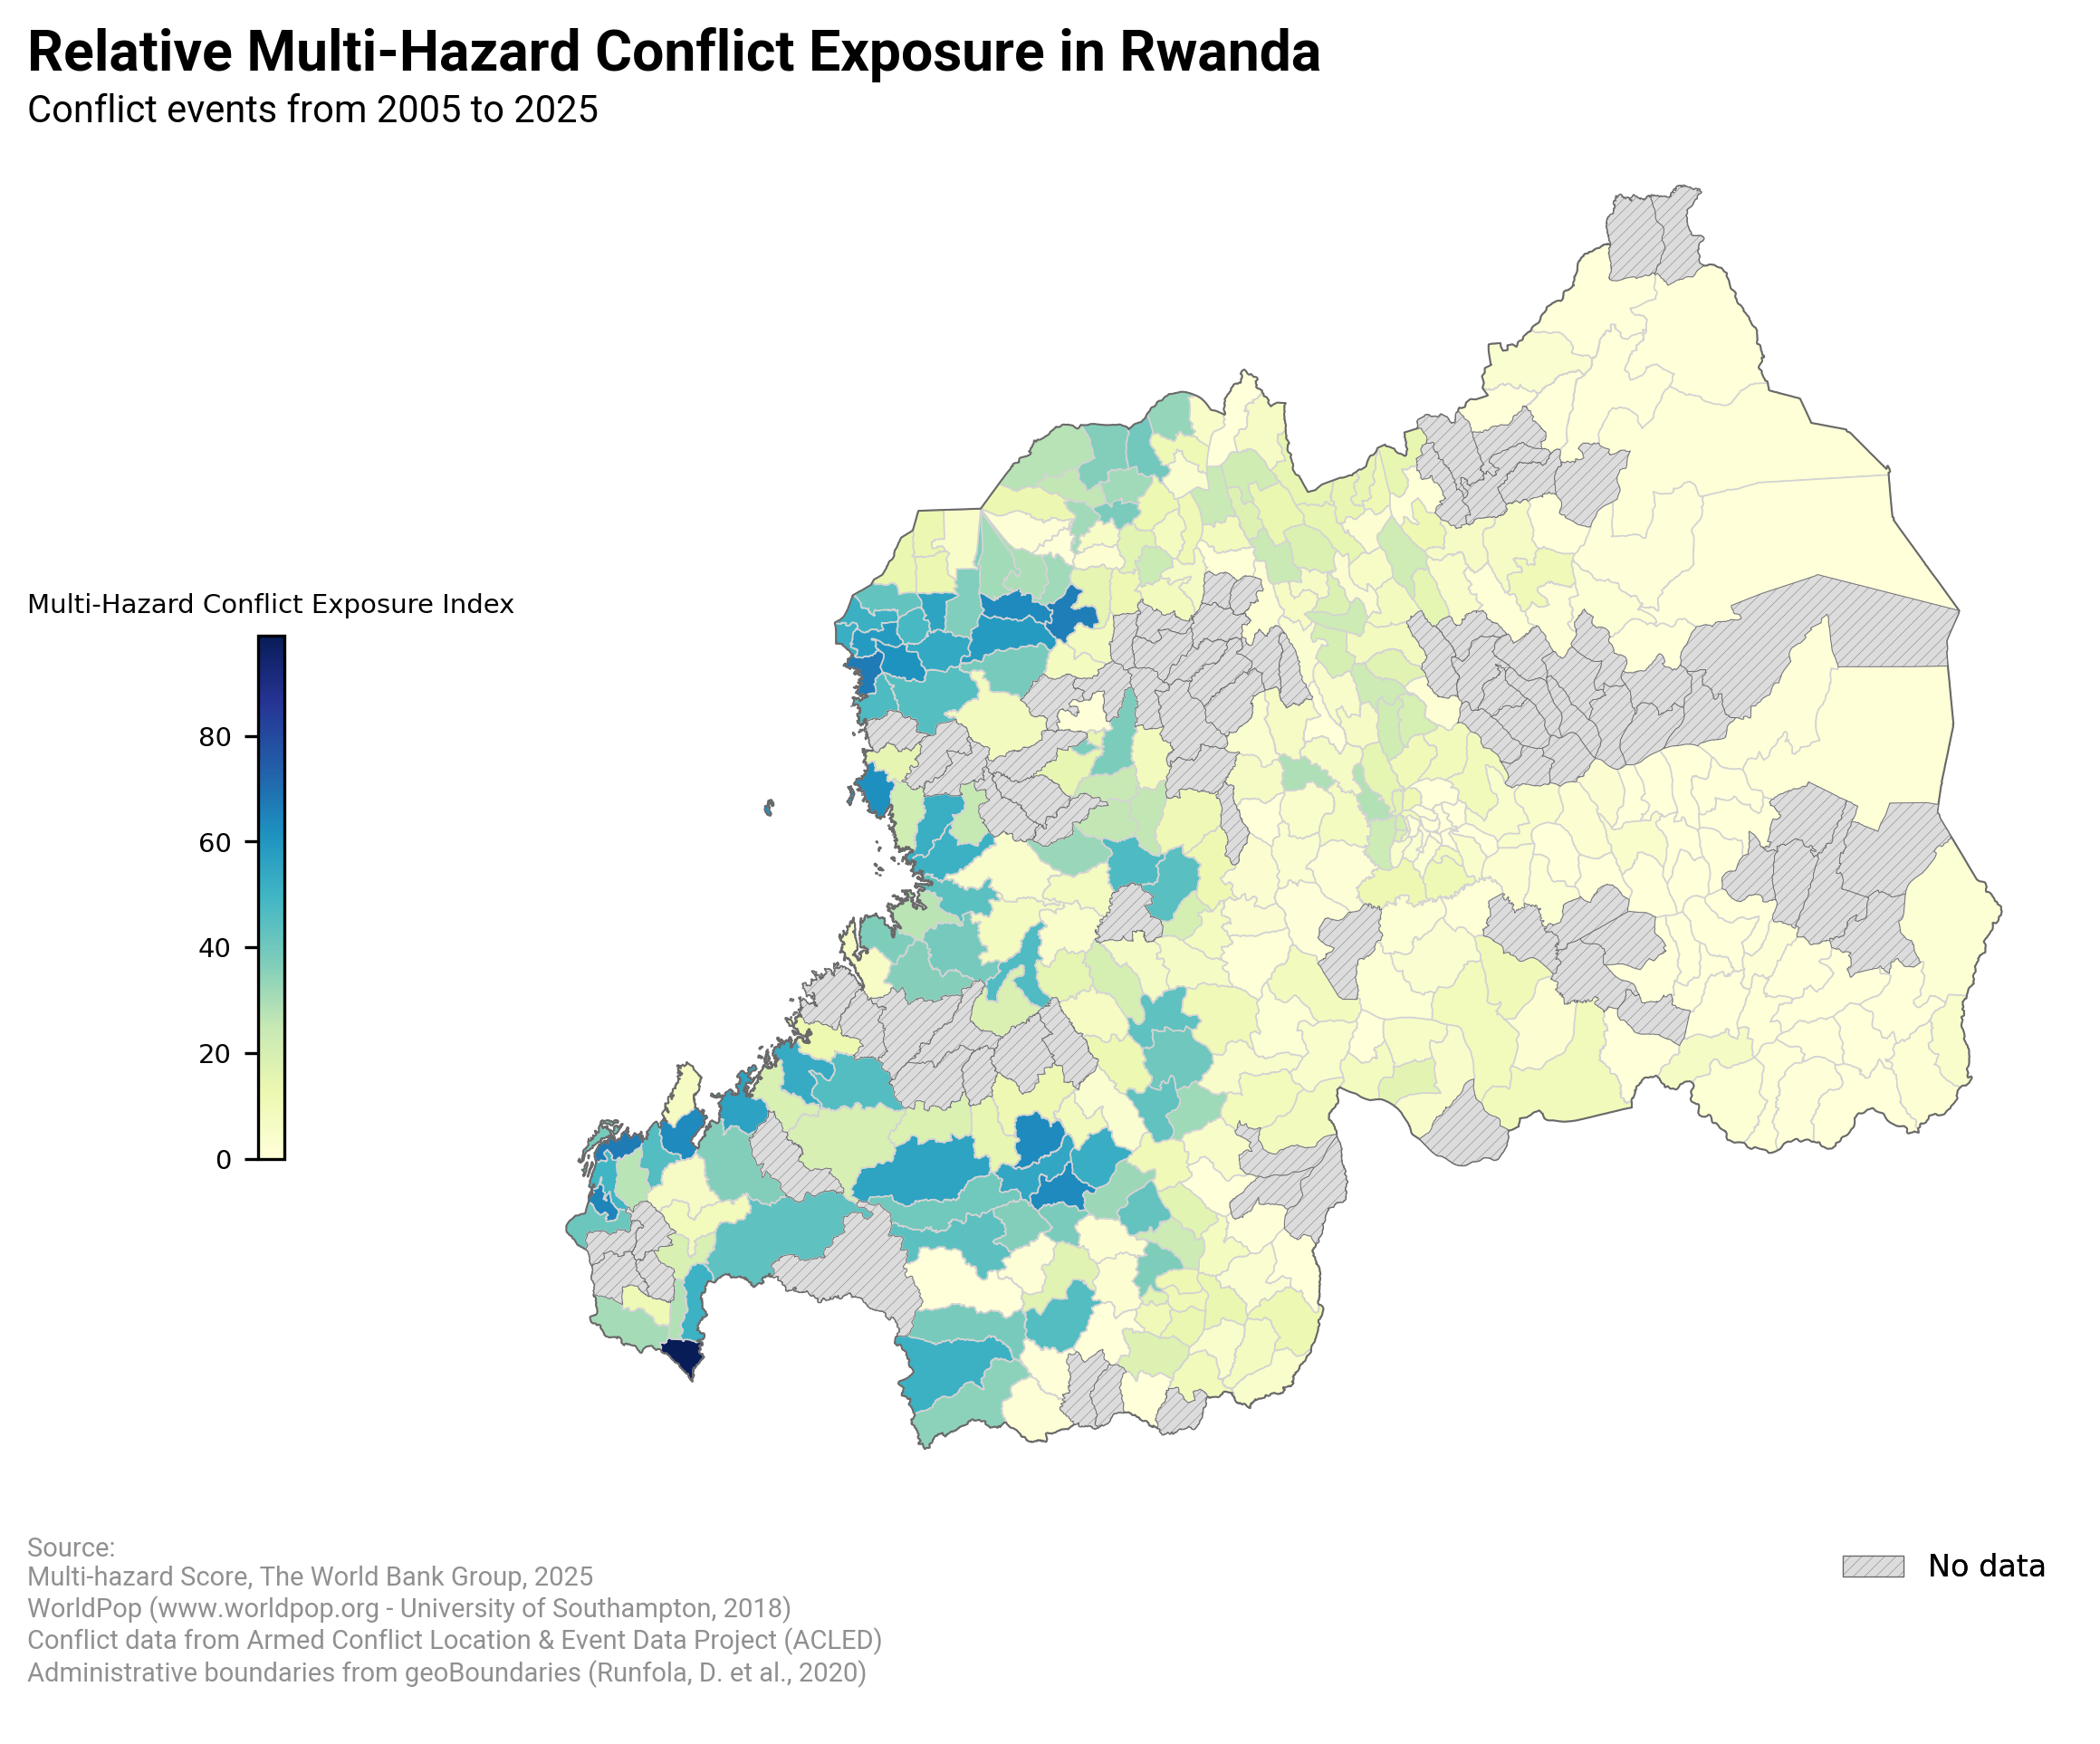

In [85]:
# @markdown ### Plot Multi-hazard Conflict Exposure Index
conflict_exposure_source = "ACLED (WBG calculation)" # @param ["ACLED (WBG calculation)", "UCDP"]
source = data_utils.get_conflict_source(dm, conflict_exposure_source)

hazard_category = "all" # @param ["all", "hydrological", "atmospheric", "geophysical", "biophysical"]

mhs_exposure = "relative" # @param ["relative", "intensity_weighted_relative"]
exposure = data_utils.get_exposure(dm, mhs_exposure)

# @markdown ---
# @markdown ### Zoom to a specific region
zoom_to_region = False # @param {type: "boolean"}
adm_level = "ADM1" # @param ["ADM1", "ADM2", "ADM3"]
adm_string = "Southern Province" # @param {type: "string"}
# @markdown ---

# @markdown ### Overlay points
overlay_points = False # @param {type: "boolean"}
clustering = False # @param {type: "boolean"}
clustering_distance = 10 # @param {type: "number"}
points = "ACLED" # @param ["ACLED", "UCDP", "OSM"]
points_column = "disorder_type" # @param ["disorder_type", "event_type", "type_of_violence", "sub_event_type", "category"]
# @markdown ---

zoom_to = None
if zoom_to_region:
   zoom_to = {adm_level: adm_string}

ax, x = geoplot.plot_choropleth(
    var=f"mhs_{hazard_category}_{source}_{exposure}",
    kwargs={"legend_type": "colorbar"},
    zoom_to=zoom_to
);

if overlay_points:
  geoplot.plot_points(
      points_column,
      dataset=points.lower(),
      clustering=clustering,
      kwargs={
          "alpha": 1,
          "legend_y": 0.30,
          "markerscale": 1,
          "cmap": "tab10"
      },
      zoom_to=zoom_to,
      distance=clustering_distance,
      ax=ax, xpos=x,
  );

## Generating Multi-hazard Conflict Exposure Bi-variate Choropleth Maps

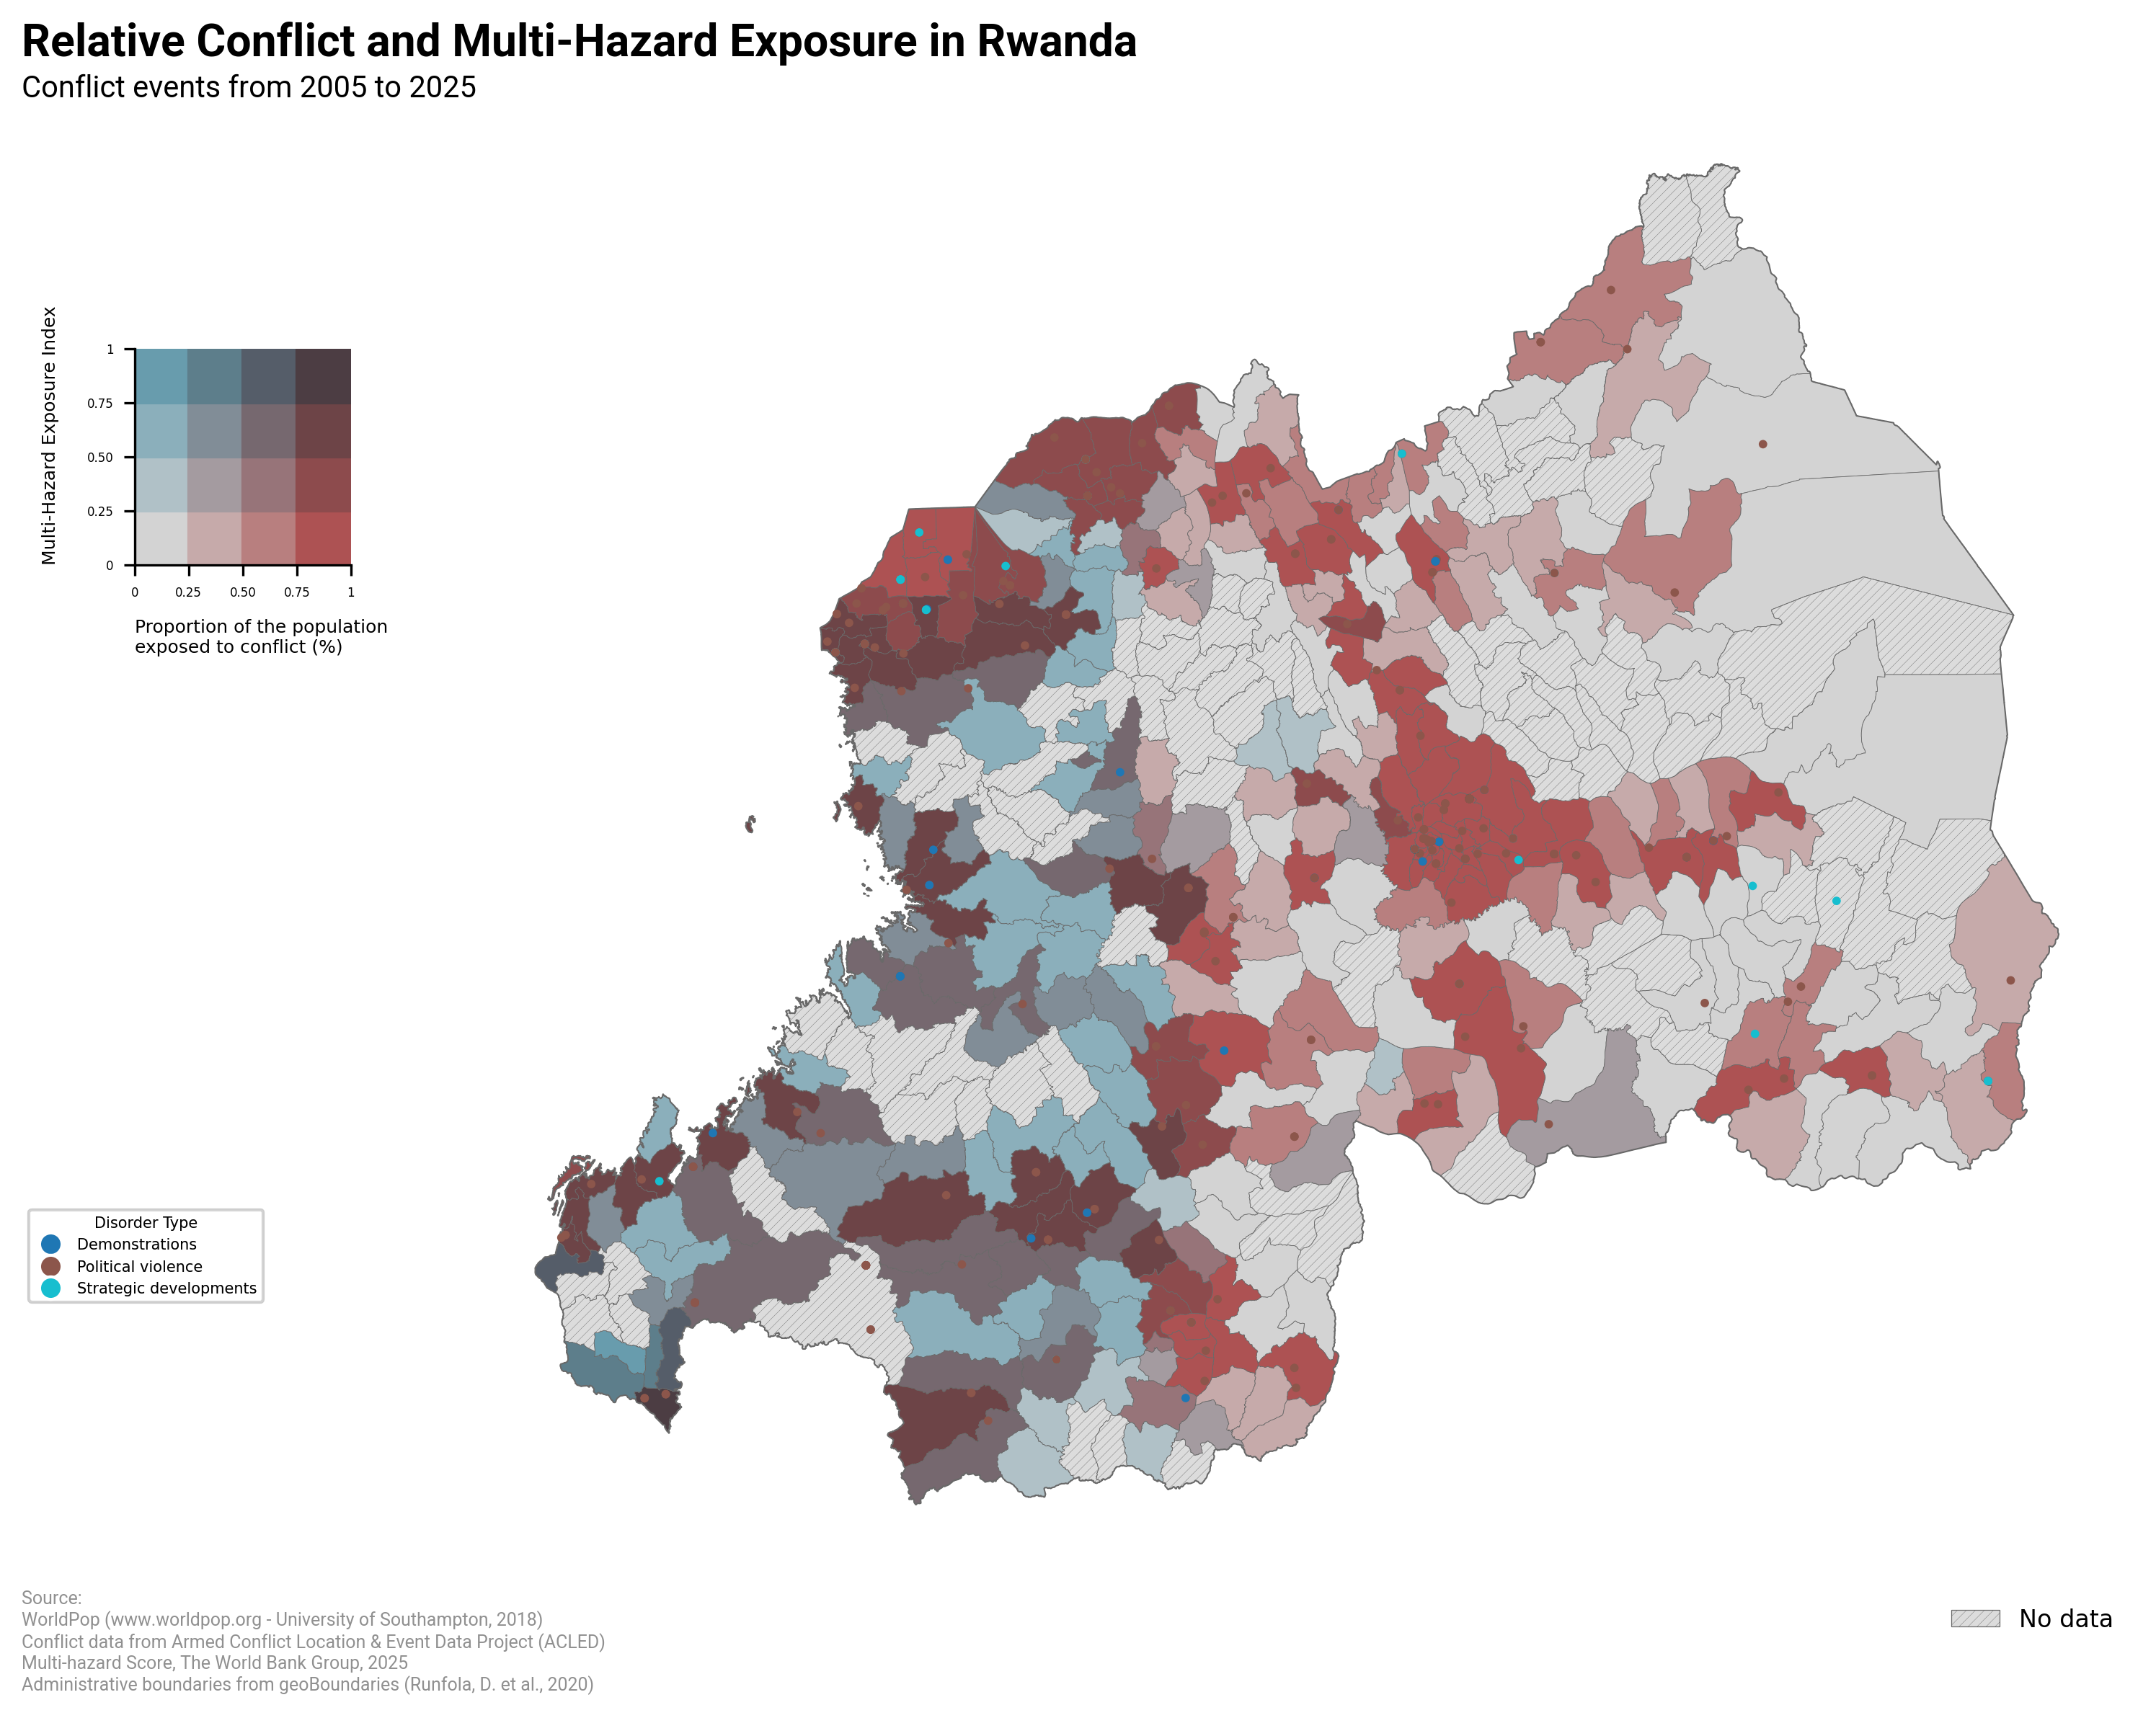

In [86]:
# @markdown ### Plot Multi-hazard Conflict Exposure Bi-variate Map
conflict_exposure_source = "ACLED (WBG calculation)" # @param ["ACLED (WBG calculation)", "UCDP"]
conflict_exposure = "relative" # @param ["absolute", "relative"]

source = data_utils.get_conflict_source(dm, conflict_exposure_source)
conflict_exposure = data_utils.get_exposure(dm, conflict_exposure)

mhs_exposure = "relative" # @param ["relative", "intensity_weighted_relative"]
mhs_exposure = data_utils.get_exposure(dm, mhs_exposure)

hazard_category = "all" # @param ["all", "hydrological", "atmospheric", "geophysical", "biophysical"]

# @markdown ---
# @markdown ### Zoom to a specific region
zoom_to_region = False # @param {type: "boolean"}
adm_level = "ADM1" # @param ["ADM1", "ADM2", "ADM3"]
adm_string = "Southern Province" # @param {type: "string"}
# @markdown ---

# @markdown ### Overlay points
overlay_points = True # @param {type: "boolean"}
clustering = False # @param {type: "boolean"}
clustering_distance = 10 # @param {type: "number"}
points = "ACLED" # @param ["ACLED", "UCDP", "OSM"]
points_column = "disorder_type" # @param ["disorder_type", "event_type", "type_of_violence", "sub_event_type", "category"]
# @markdown ---

zoom_to = None
if zoom_to_region:
   zoom_to = {adm_level: adm_string}

ax, x = geoplot.plot_bivariate_choropleth(
    var1=f"{source}_{conflict_exposure}",
    var2=f"mhs_{hazard_category}_{dm.asset}_{mhs_exposure}",
    var1_bounds=[0, 1],
    var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4,
        "edgecolor": "dimgray",
        "linewidth": 0.2
    },
    zoom_to=zoom_to
);

if overlay_points:
  geoplot.plot_points(
      points_column,
      dataset=points.lower(),
      clustering=clustering,
      kwargs={
          "alpha": 1,
          "legend_y": 0.30,
          "markerscale": 1,
          "cmap": "tab10"
      },
      zoom_to=zoom_to,
      distance=clustering_distance,
      ax=ax, xpos=x,
  );

## Interactive Mapping with Folium

In [ ]:
m = geoplot.plot_folium(
    adm_level=adm_level,
    var="mhs_all_wbg_acled_worldpop_exposure_relative",
    kwargs={"zoom_start": 9}
)
m

In [ ]:
 m.save("folium.html")